In [1]:
# from analyse import prepare_data
import matplotlib.pyplot as plt
import numpy as np
from analyse import extract_data
from statistics import stdev, mean

In [2]:
default_fig_size = [14, 10]
extended_fig_size = [30, 100]
plt.rcParams['figure.figsize'] = default_fig_size
plt.rcParams.update({'font.size': 20})

In [27]:
energy_opt, stats_opt, info_opt = extract_data('/home/serchio/Documents/COAT/lora_wakeup/data/sx1262_optimal', new_format=True)
energy_nbs, stats_nbs, info_nbs = extract_data('/home/serchio/Documents/COAT/lora_wakeup/data/sx1262_nbs', new_format=True)
energy_perf, stats_perf, info_perf = extract_data('/home/serchio/Documents/COAT/lora_wakeup/data/sx1262_performance', new_format=True)
energy_join, stats_join, info_join = extract_data('/home/serchio/Documents/COAT/lora_wakeup/data/sx1262_join', new_format=True)
energy_dcw, stats_dcw, info_dcw = extract_data('/home/serchio/Documents/COAT/lora_wakeup/data/sx1262_dcw', new_format=True)
energy_dcw2, stats_dcw2, info_dcw2 = extract_data('/home/serchio/Documents/COAT/lora_wakeup/data/sx1262_dcw2', new_format=True)

In [4]:
def get_keys(data, requested_kbytes, nr_of_dev=None, dw=None, dcw=None, lorawan=True):
    to_find = f'_{requested_kbytes}'
    if nr_of_dev is not None:
        to_find = f'_{requested_kbytes}_{nr_of_dev}'
    requested_keys = []
    for key in data.keys():
        if key.find(to_find) >= 0:
            requested_keys.append(key)
    
    filtered_keys = []
    final_keys = []
    for key in requested_keys:
        if key.find('colora') >= 0:
            filtered_keys.append(key)
        if lorawan and key.find('lorawan') >= 0:
            final_keys.append(key)
    
    if dw is not None and dcw is not None:
        for key in filtered_keys:
            if lorawan and key.find('lorawan') >= 0:
                final_keys.append(key)
                continue
            if key.find(f'{dw}_{dcw}') >= 0:
                final_keys.append(key)
    else:
        final_keys += filtered_keys
        
    return final_keys

def get_avg_joules(data, keys):
    gw = []
    eds = []
    eds_stdev = []
    for key in keys:
#         tmp_key_data = data[key]
        gw.append(data[key][0][0])
        key_eds = [data[key][x][0] for x in data[key] if x >= 1]
        if len(key_eds) > 1:
            eds.append(mean(key_eds))
            eds_stdev.append(stdev(key_eds))
        else:
            eds.append(key_eds[0])
            eds_stdev.append(0.0)
        
    return gw, eds, eds_stdev

def prepare_labels(keys, info):
    labels = []
    for key in keys:
        if key.find('lorawan') >= 0:
            labels.append(f'LoRaWAN: 1 x ED\nTd = {info[key]["delay"]}s')
            continue
            
        nr_dev = key.split('_')[2]
#         labels.append(f'CoLoRa: {nr_dev} x EDs\nTd = {info[key]["delay"]}s, Tdw = {info[key]["dw"]}s, Tdcw = {info[key]["dcw"]}s')
        labels.append(f'CoLoRa: {nr_dev} x ED\nTd = {info[key]["delay"]}s')
        
    return labels

In [5]:
print(energy_dcw.keys())

dict_keys(['colora_512_20_39_5', 'colora_512_20_39_80', 'colora_512_20_39_40', 'colora_512_20_39_20', 'colora_512_20_39_10'])


In [6]:
# keys_512 = ['lorawan_512_1', 'colora_512_1_20_20', 'colora_512_5_20_20', 'colora_512_10_20_20', 'colora_512_15_20_20', 'colora_512_20_20_20']
keys_128 = ['lorawan_128_1', 'colora_128_1_6_11', 'colora_128_5_13_24', 'colora_128_10_22_41', 'colora_128_15_31_57', 'colora_128_20_39_74']
keys_256 = ['lorawan_256_1', 'colora_256_1_6_11', 'colora_256_5_13_24', 'colora_256_10_22_41', 'colora_256_15_31_57', 'colora_256_20_39_74']
keys_512 = ['lorawan_512_1', 'colora_512_1_6_11',  'colora_512_5_13_24', 'colora_512_10_22_41', 'colora_512_15_31_57', 'colora_512_20_39_74']
keys_1024 = ['lorawan_1024_1', 'colora_1024_1_6_11',  'colora_1024_5_13_24', 'colora_1024_10_22_41', 'colora_1024_15_31_57', 'colora_1024_20_39_74']
legend = ['LoRaWAN: 20 ED', 'CoLoRa: 1 ED', 'CoLoRa: 5 ED', 'CoLoRa: 10 ED', 'CoLoRa: 15 ED', 'CoLoRa: 20 ED']
labels = [128, 256, 512, 1024]

keys = []
for i in range(0, len(keys_128)):
    k = []
    k.append(keys_128[i])
    k.append(keys_256[i])
    k.append(keys_512[i])
    k.append(keys_1024[i])
    keys.append(k)

gw = []
dev = []
dev_std = []
delay = []
for key in keys:
    t_gw, t_dev, t_dev_std = get_avg_joules(energy_opt, key)
    gw.append(t_gw)
    dev.append(t_dev)
    dev_std.append(t_dev_std)
    t_delay = [info_opt[x]['delay'] for x in key]
    delay.append(t_delay)

print(stats_opt['colora_1024_1_6_11'])
# gw, dev, dev_std = get_avg_joules(energy_opt, keys_512)
# labels_512 = prepare_labels(keys_512, info_opt)
# compare_to_lorawan(labels_512, gw, dev, dev_std)

{0: [21294.0, 266816.0, 20926.0, 1055316.0], 1: [20926.0, 1055316.0, 1048576.0, 21294.0, 365.0, 20561.0]}


In [7]:
def plot_overview(labels, legend, data, x_label, y_label=None, sub=False, std=None):
    import math
    from matplotlib.lines import Line2D
    f_size = 20

    if sub:
        l_legend = legend[0]
        l_data = data[0]
        legend = legend[1:]
        data = data[1:]
    
    x = np.arange(len(labels))  # the label locations
    x = labels  # the label locations
    
    styles = ['v--', 'o--', '^--', 's--', 'D--', 'p--']
    fig, ax = plt.subplots()
    for i in range(0, len(data)):
        ax.plot(x, data[i], styles.pop(), label=legend[i], markersize=8)
        if std is not None:
#             plt.errorbar(x, data[i], std[i], linestyle='None', marker='^')
            plt.errorbar(x, data[i], yerr=std[i], fmt='none', ecolor='black', elinewidth=1, capsize=2)
    
    if sub:
        ins = ax.inset_axes([0.37,0.73,0.3,0.23])
        ins.set_xticks([x for x in range(0, 1024 + 128, 1024)])
        ins.set_xticklabels([f'{x}KB' for x in range(0, 1024 + 128, 1024)])
        ins.plot([0, 1024], [l_data, l_data], 'k-')
#         ins.set_yticks()
    
    # Add some text for labels, title and custom x-axis tick labels, etc.
    if y_label is not None:
        ax.set_ylabel(y_label)
    else:
        ax.set_ylabel('Estimated energy consumption [Joules]')

    ax.set_xlabel(x_label)
    # ax.set_title('Estimated energy usage for various scenarios for a period of 365 days')
#     ax.set_title('Simulated battery capacity required for the device to work in various scenarios for a period of 365 days')
    ax.set_xticks([x for x in range(128, 1024 + 128, 128)])
    lim = ax.get_ylim()
    if lim[1] > 15000:
        max_y = math.floor(lim[1] / 5000) * 5000
        ax.set_yticks([x for x in range (0, max_y + 5000, 5000)])
        for label in ax.yaxis.get_ticklabels()[::2]:
            label.set_visible(False)
    ax.set_xticklabels([f'{x}KB' for x in range(128, 1024 + 128, 128)])
#     ax.set_xticklabels(labels, rotation=45, ha='right')
    ax.tick_params(axis='both', which='major', labelsize=f_size)
    ax.tick_params(axis='both', which='minor', labelsize=f_size)
    ax.grid(True)
    handles, labels = ax.get_legend_handles_labels()
    if sub:
        line = Line2D([0], [0], color='k', lw=2, linestyle='-', label=l_legend)
        # manually define a new patch 
#         patch = mpatches.Patch(color='grey', label='Manual Label')
        # handles is a list, so append manual patch
        handles.append(line) 
#     ax.set_yscale('log')
    ax.legend(handles=handles, fontsize=f_size)
#     ax.legend(fontsize=f_size)


    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(int(round(height, 0))),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom', fontsize=f_size - 2)


#     autolabel(rects1)
#     autolabel(rects2)

    fig.tight_layout()

    plt.show()
    
def plot_overview_bars_eds(labels, legend, data, x_label, y_label=None, sub=False, std=None):
    f_size = 20
    
    x = np.arange(len(labels))  # the label locations
    width = 0.9  # the width of the bars
    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/6*2.5, data[0], width/6, label=legend[0])
    rects2 = ax.bar(x - width/6*1.5, data[1], width/6, label=legend[1])
    rects3 = ax.bar(x - width/6/2, data[2], width/6, label=legend[2])
    rects4 = ax.bar(x + width/6/2, data[3], width/6, label=legend[3])
    rects5 = ax.bar(x + width/6*1.5, data[4], width/6, label=legend[4])
    rects6 = ax.bar(x + width/6*2.5, data[5], width/6, label=legend[5])

    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.tick_params(axis='both', which='major', labelsize=f_size)
    ax.tick_params(axis='both', which='minor', labelsize=f_size)
    ax.legend(fontsize=f_size, loc='upper left')
    ax.grid(True)

    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            if int(round(height, 0)) == 0.0:
                continue
            ax.annotate('{}'.format(int(round(height, 0))),
                        xy=(rect.get_x() + rect.get_width() / 6 * 3, height),
#                         xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom', fontsize=f_size - 2, weight='bold')


    autolabel(rects1)
    autolabel(rects2)
    autolabel(rects3)
    autolabel(rects4)
    autolabel(rects5)
    autolabel(rects6)
    colors = []
    for i in range(1, 7):
        rects = vars()[f'rects{i}']
        colors.append(rects[0].get_facecolor())

    plt.show()
    return colors
    
def plot_overview_bars_gws(labels, legend, data, x_label, y_label, colors):
    from matplotlib.patches import Patch
    f_size = 20
    
    x = np.arange(len(labels))  # the label locations
    width = 0.9  # the width of the bars
    fig, ax = plt.subplots()
    handles = []
    for l in range(0, len(legend)):
        patch = Patch(color=colors[l], label=legend[l])
        handles.append(patch)
    ax.legend(handles=handles, fontsize=f_size)
#     rects1 = ax.bar(x - width/6*2.5, data[0], width/6, label=legend[0])
    rects2 = ax.bar(x - width/5*2, data[1], width/5, label=legend[1], color=colors[1])
    rects3 = ax.bar(x - width/5, data[2], width/5, label=legend[2], color=colors[2])
    rects4 = ax.bar(x, data[3], width/5, label=legend[3], color=colors[3])
    rects5 = ax.bar(x + width/5, data[4], width/5, label=legend[4], color=colors[4])
    rects6 = ax.bar(x + width/5*2, data[5], width/5, label=legend[5], color=colors[5])
    
    ins = ax.inset_axes([0.4,0.67,0.05,0.23])
    ins.set_xticks([0])
    ins.bar([0], data[0], width/5, color=colors[0])
    ins_y_labels = []
    ins_y = ins.get_yticks()
    for y in ins_y:
        if y == 0:
            ins_y_labels.append(f'0')
            continue
        ins_y_labels.append(f'{int(y / 1000000)}M')
    ins.set_yticks(ins_y)
    ins.set_yticklabels(ins_y_labels)
    ins.grid(True)
        
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.tick_params(axis='both', which='major', labelsize=f_size)
    ax.tick_params(axis='both', which='minor', labelsize=f_size)
    ax.grid(True)


    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            if int(round(height, 0)) == 0.0:
                continue
            ax.annotate('{}'.format(int(round(height, 0))),
                        xy=(rect.get_x() + rect.get_width() / 6 * 3, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom', fontsize=f_size - 2, weight='bold')


    autolabel(rects2)
    autolabel(rects3)
    autolabel(rects4)
    autolabel(rects5)
    autolabel(rects6)
    
    plt.show()

# Energy EDs

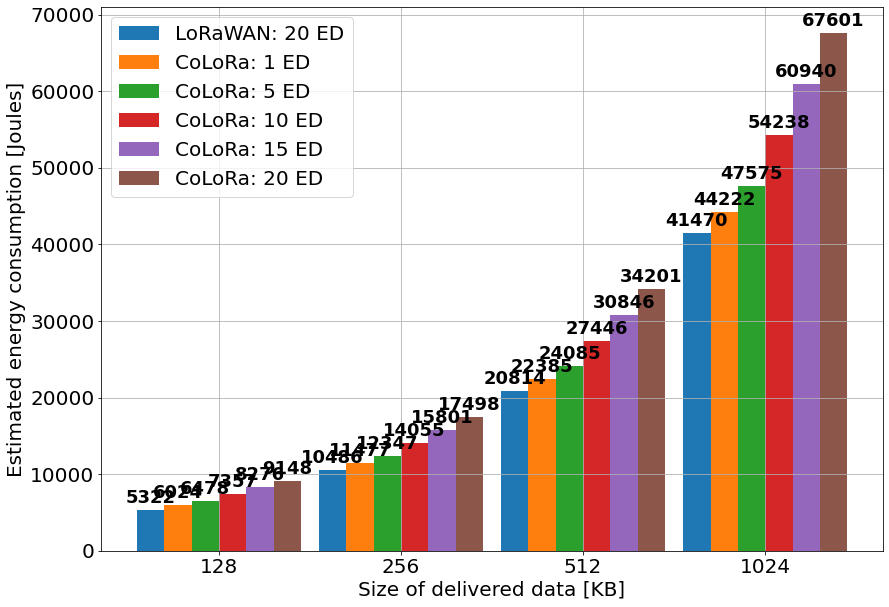

In [8]:
# plot_overview(labels, legend, dev, 'Size of delivered data [KB]')
colors = plot_overview_bars_eds(labels, legend, dev, 'Size of delivered data [KB]', 'Estimated energy consumption [Joules]')

# Energy GWs

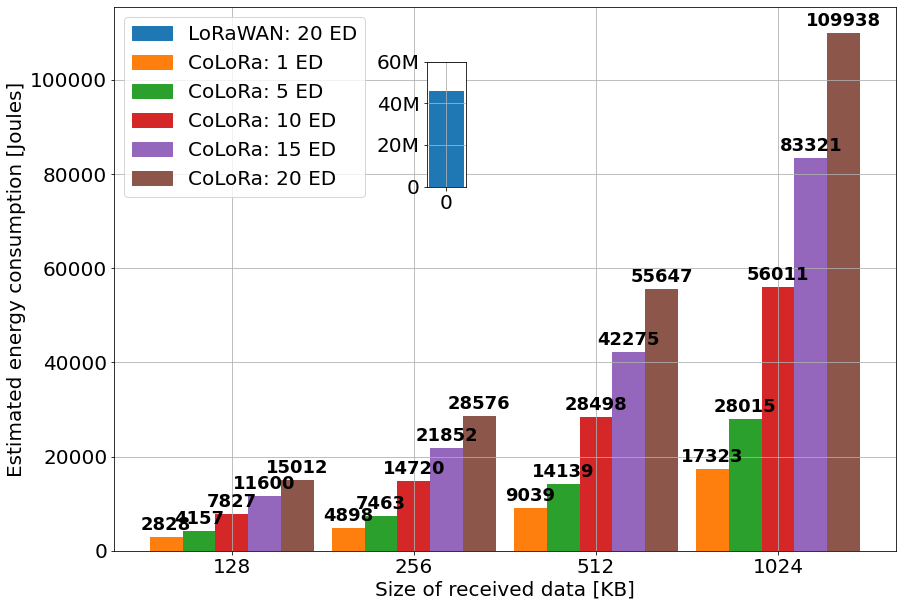

In [9]:
# plot_overview(labels, legend, gw, 'Size of requested data [KB]', sub=True)
plot_overview_bars_gws(labels, legend, gw, 'Size of received data [KB]', 'Estimated energy consumption [Joules]', colors)

# Delay EDs

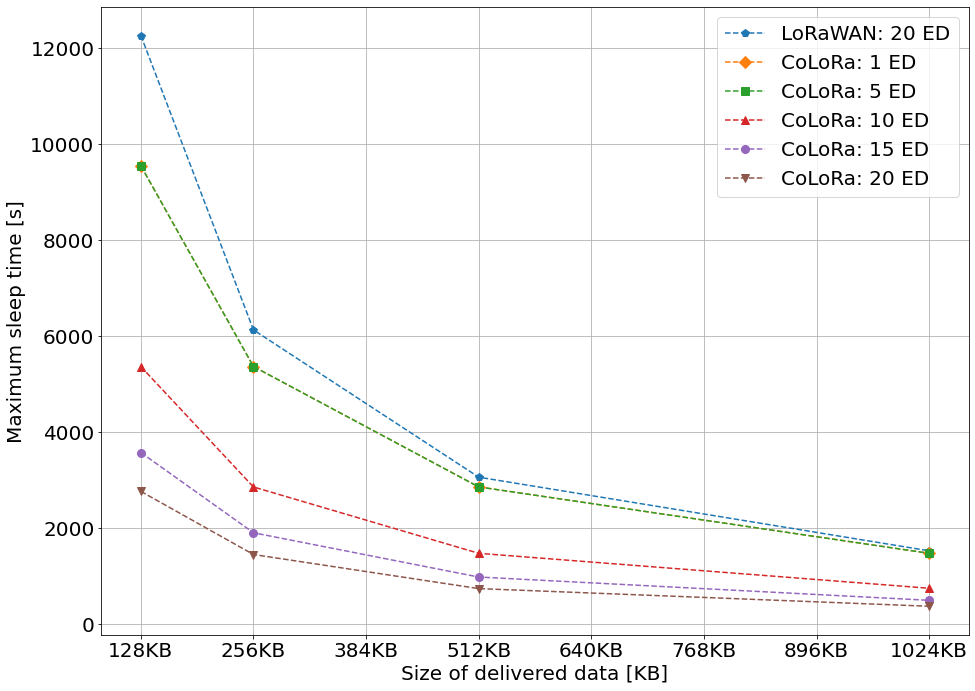

In [10]:
plot_overview(labels, legend, delay, 'Size of delivered data [KB]', 'Maximum sleep time [s]')

In [11]:
def compare_to_lorawan(labels, gw, dev, log_scale=True):
    f_size = 20

    x = np.arange(len(labels))  # the label locations
    width = 0.45  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, gw, width, label='GW')
    rects2 = ax.bar(x + width/2, dev, width, label='ED')
#     plt.errorbar(x + width/2, dev, yerr=dev_std, fmt='none', ecolor='black', elinewidth=1, capsize=10)
    
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Joules')
    # ax.set_title('Estimated energy usage for various scenarios for a period of 365 days')
#     ax.set_title('Simulated battery capacity required for the device to work in various scenarios for a period of 365 days')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
#     ax.set_xticklabels(labels, rotation=45, ha='right')
    ax.tick_params(axis='both', which='major', labelsize=f_size)
    ax.tick_params(axis='both', which='minor', labelsize=f_size)
    if log_scale:
        ax.set_yscale('log')
    ax.legend(fontsize=f_size)
    ax.grid(True)

    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(int(round(height, 0))),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom', fontsize=f_size - 2)


    autolabel(rects1)
    autolabel(rects2)

    fig.tight_layout()

    plt.show()
    
def bytes_bar(labels, data, y_label=None, x_label=None, rotate=False):
    f_size = 20

    x = np.arange(len(labels))  # the label locations
    width = 0.45  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(x, data, width)
#     rects2 = ax.bar(x + width/2, dev, width, label='END-DEVICE')
#     plt.errorbar(x + width/2, dev, yerr=dev_std, fmt='none', ecolor='black', elinewidth=1, capsize=10)
    
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Bytes sent [KB]')
    if y_label is not None:
        ax.set_ylabel(y_label)
    if x_label is not None:
        ax.set_xlabel(x_label)
    # ax.set_title('Estimated energy usage for various scenarios for a period of 365 days')
#     ax.set_title('Simulated battery capacity required for the device to work in various scenarios for a period of 365 days')
    ax.set_xticks(x)
    if not rotate:
        ax.set_xticklabels(labels)
    else:
        ax.set_xticklabels(labels, rotation=45, ha='right')
    ax.tick_params(axis='both', which='major', labelsize=f_size)
    ax.tick_params(axis='both', which='minor', labelsize=f_size)
#     ax.set_yscale('log')
#     ax.legend(fontsize=f_size)


    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(int(round(height, 0))),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom', fontsize=f_size - 2)


    autolabel(rects1)
#     autolabel(rects2)

    fig.tight_layout()

    plt.show()

In [12]:
keys_perf = ['lorawan_max_1', 'colora_max_1_5_8', 'colora_max_5_10_17', 'colora_max_10_17_29', 'colora_max_15_24_41', 'colora_max_20_31_52']

# print(stats_perf['colora_max_5_10_17'])
# print(stats_perf['lorawan_max_1'])
bytes_perf = [round(stats_perf['lorawan_max_1'][1][1] / 1024, 0)]
packets_perf = [stats_perf['lorawan_max_1'][1][0]]
for key in keys_perf[1:]:
    bytes_perf.append(round(stats_perf[key][1][2] / 1024, 2))
    packets_perf.append(stats_perf[key][1][0])
    
# print(bytes_perf)
# print(packets_perf)
gw, dev, _ = get_avg_joules(energy_perf, keys_perf)

# Performance

## Max bytes

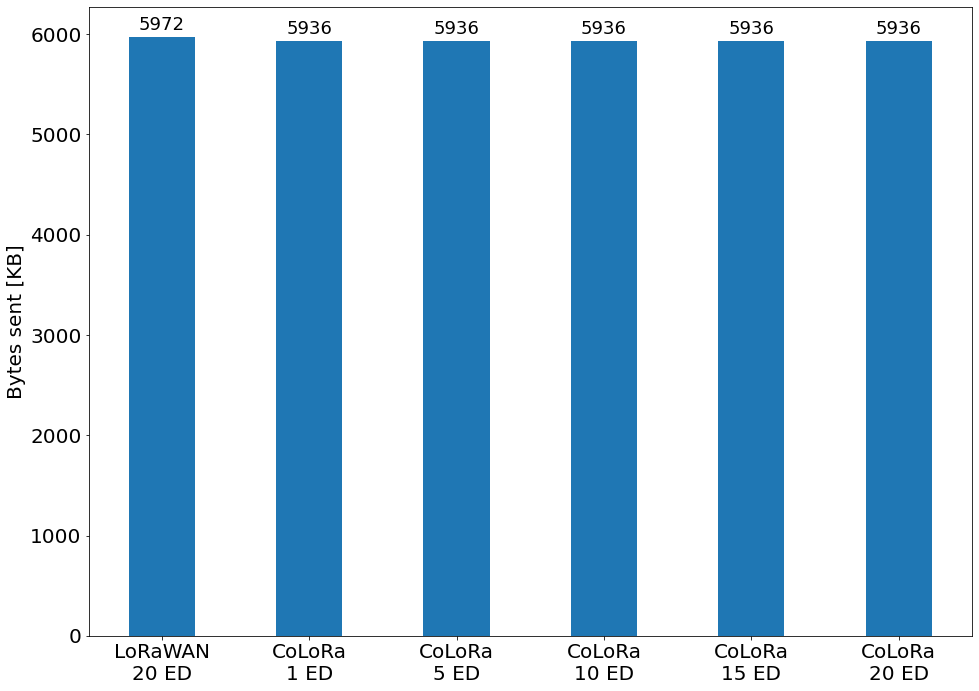

In [13]:
legend = ['LoRaWAN\n20 ED', 'CoLoRa\n1 ED', 'CoLoRa\n5 ED', 'CoLoRa\n10 ED', 'CoLoRa\n15 ED', 'CoLoRa\n20 ED']
bytes_bar(legend, bytes_perf)

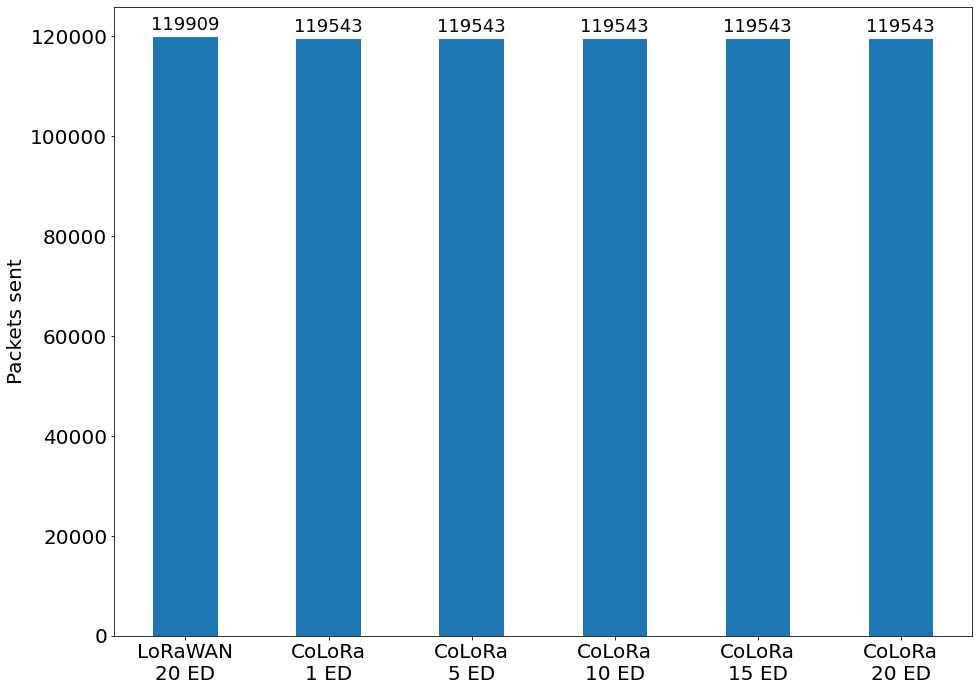

In [14]:
bytes_bar(legend, packets_perf, 'Packets sent')

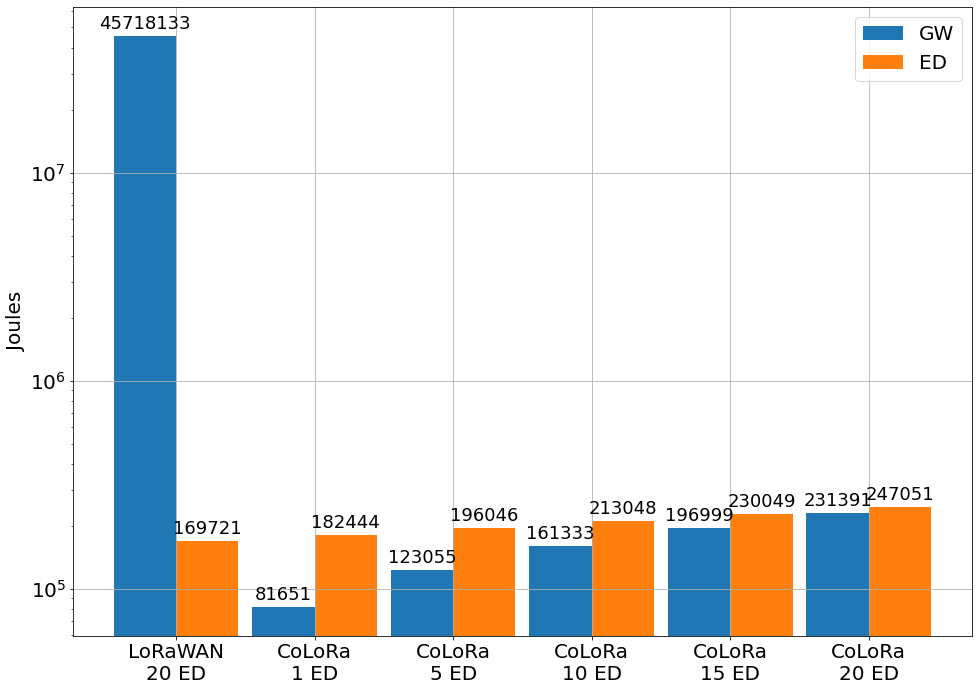

In [15]:
compare_to_lorawan(legend, gw, dev)

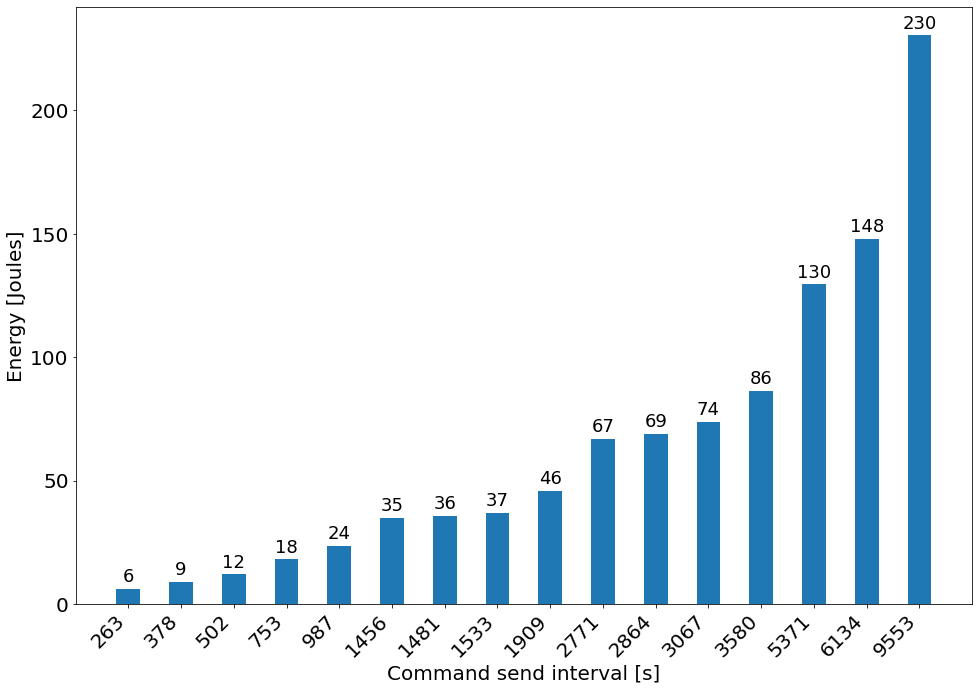

In [16]:
keys_join = []
delay_join = []
# for key in info_opt:
# #     print(f'{key}: {info_opt[key]["delay"]}')
#     keys_join.append(key)
#     delay_join.append(info_opt[key]["delay"])
# #     delay_join.append(key)
    
# join_sorted = sorted(zip(delay_join, keys_join), key=lambda x: x[0])
# for key, value in join_sorted:
#     print(key, value)
for key in info_join:
    keys_join.append(key)
    delay_join.append(info_join[key]['delay'])
    
join_sorted = sorted(zip(delay_join, keys_join), key=lambda x: x[0])
legend = []
keys_join = []
data = []
for key, value in join_sorted:
    legend.append(key)
    keys_join.append(value)
    data.append(energy_join[value][1][0])
    
bytes_bar(legend, data, 'Energy [Joules]', 'Command send interval [s]', True)

In [17]:
def get_min_max_joules(data, keys):
    gw = []
    eds = []
    eds_stdev = []
    for key in keys:
#         tmp_key_data = data[key]
        gw.append(data[key][0][0])
        key_eds = [data[key][x][0] for x in data[key] if x >= 1]
        if len(key_eds) > 1:
            eds.append(min(key_eds))
            eds.append(max(key_eds))
        
    return gw, eds

[106969.45, 109937.86, 106969.45]
[51676.53, 67600.735, 83512.95]


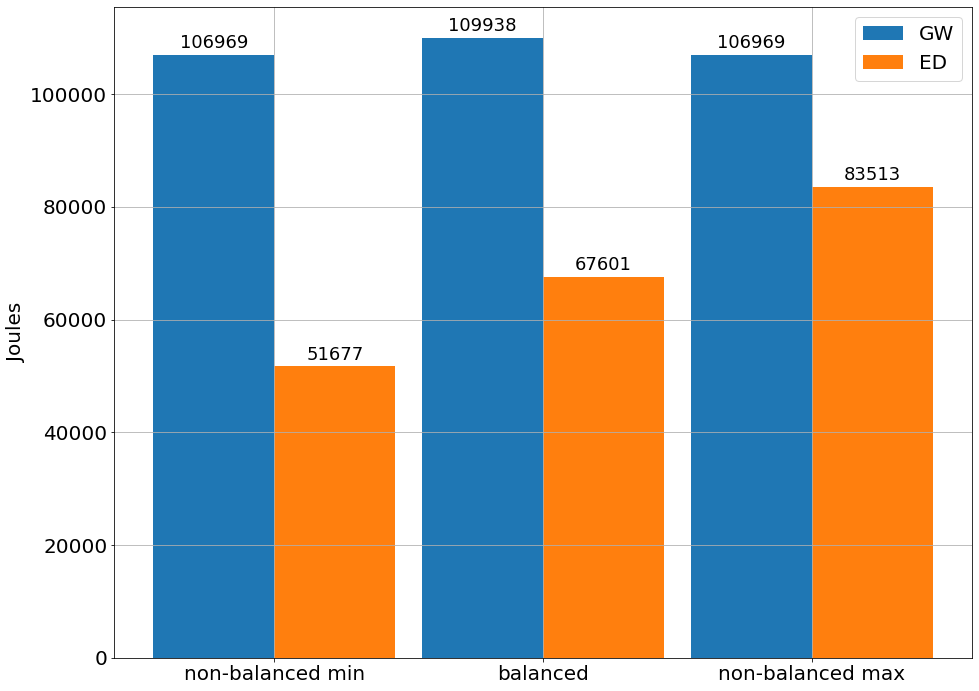

In [18]:
gw_opt, dev_opt, _ = get_avg_joules(energy_opt, ['colora_1024_20_39_74'])
gw_nbs, dev_nbs = get_min_max_joules(energy_nbs, ['colora_1024_20_39_74'])

gw = [gw_nbs[0], gw_opt[0], gw_nbs[0]]
dev = [dev_nbs[0], dev_opt[0], dev_nbs[1]]
print(gw)
print(dev)
legend = ['non-balanced min', 'balanced', 'non-balanced max']
compare_to_lorawan(legend, gw, dev, False)

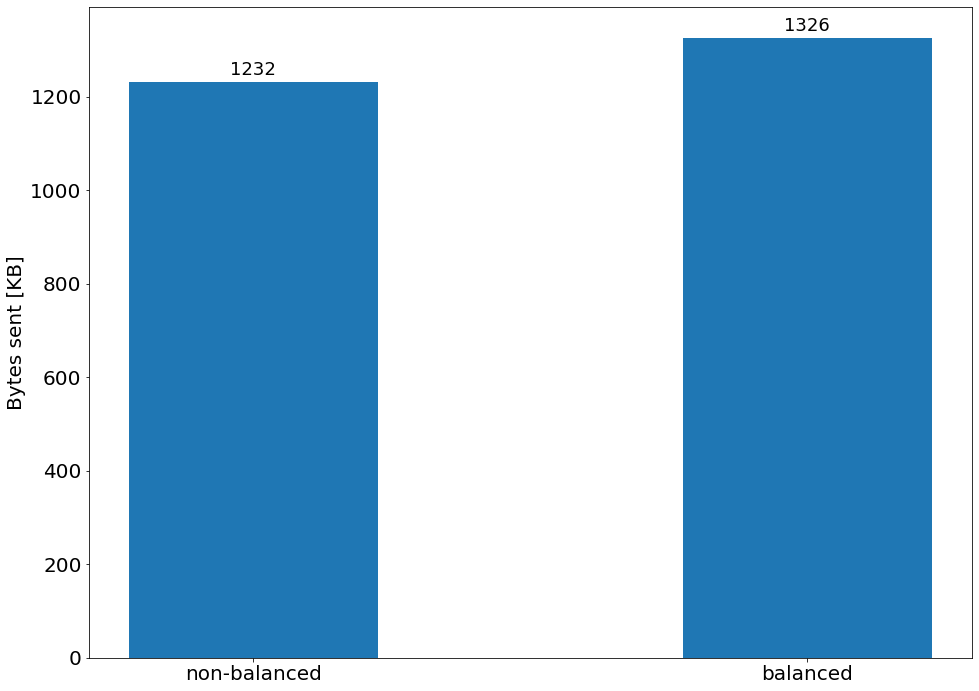

In [19]:
# print(stats_opt['colora_1024_20_39_74'][0][1])
bytes_nbs_bs = []
bytes_nbs_bs.append(round(stats_nbs['colora_1024_20_39_74'][0][1] / 1024, 2))
bytes_nbs_bs.append(round(stats_opt['colora_1024_20_39_74'][0][1] / 1024, 2))
bytes_bar(['non-balanced', 'balanced'], bytes_nbs_bs)

# DCW effect on energy usage

In [28]:
keys_dcw = ['colora_512_20_39_5', 'colora_512_20_39_10', 'colora_512_20_39_20', 'colora_512_20_39_40', 'colora_512_20_39_80']
keys_dcw2 = ['colora_512_20_39_10', 'colora_512_20_39_20', 'colora_512_20_39_40', 'colora_512_20_39_80']
gw_dcw, dev_dcw, _ = get_avg_joules(energy_dcw, keys_dcw)
gw_dcw2, dev_dcw2, _ = get_avg_joules(energy_dcw2, keys_dcw2)
legend = ['DCW: 5', 'DCW: 10', 'DCW: 20', 'DCW: 40', 'DCW: 80']
legend2 = ['DCW: 10', 'DCW: 20', 'DCW: 40', 'DCW: 80']
delay_dcw = [info_dcw[x]['delay'] for x in keys_dcw]
delay_dcw2 = [info_dcw[x]['delay'] for x in keys_dcw2]

## Energy usage

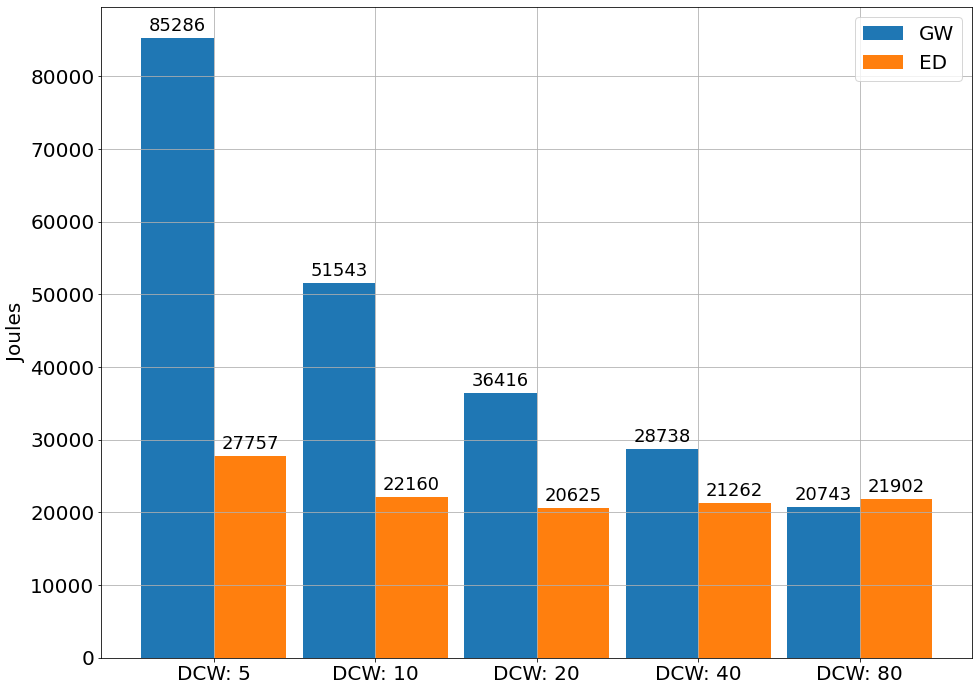

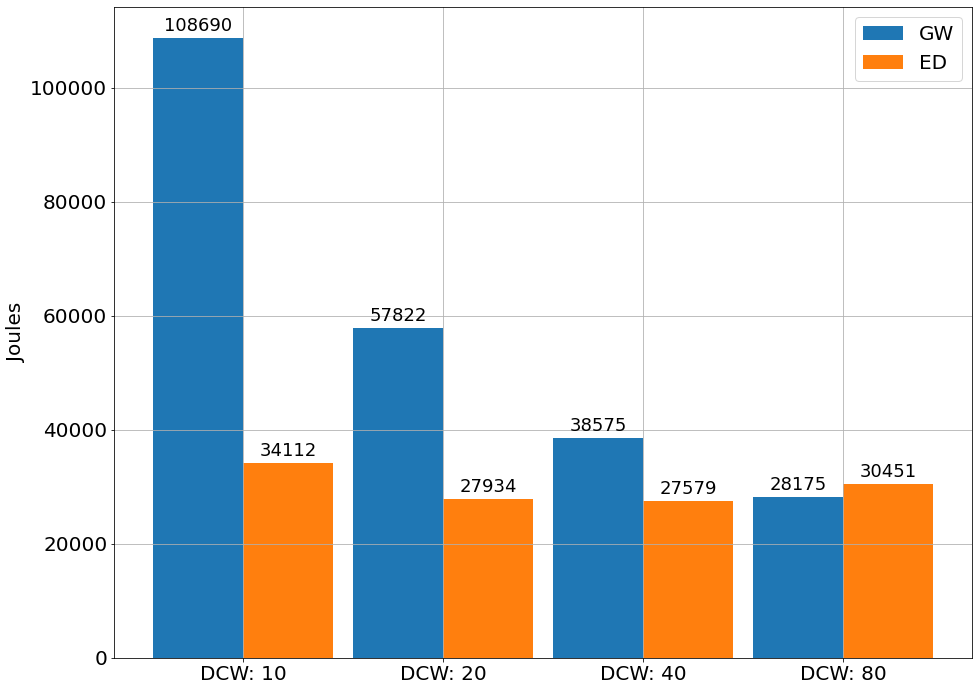

In [29]:
compare_to_lorawan(legend, gw_dcw, dev_dcw, False)
compare_to_lorawan(legend2, gw_dcw2, dev_dcw2, False)

## Send interval

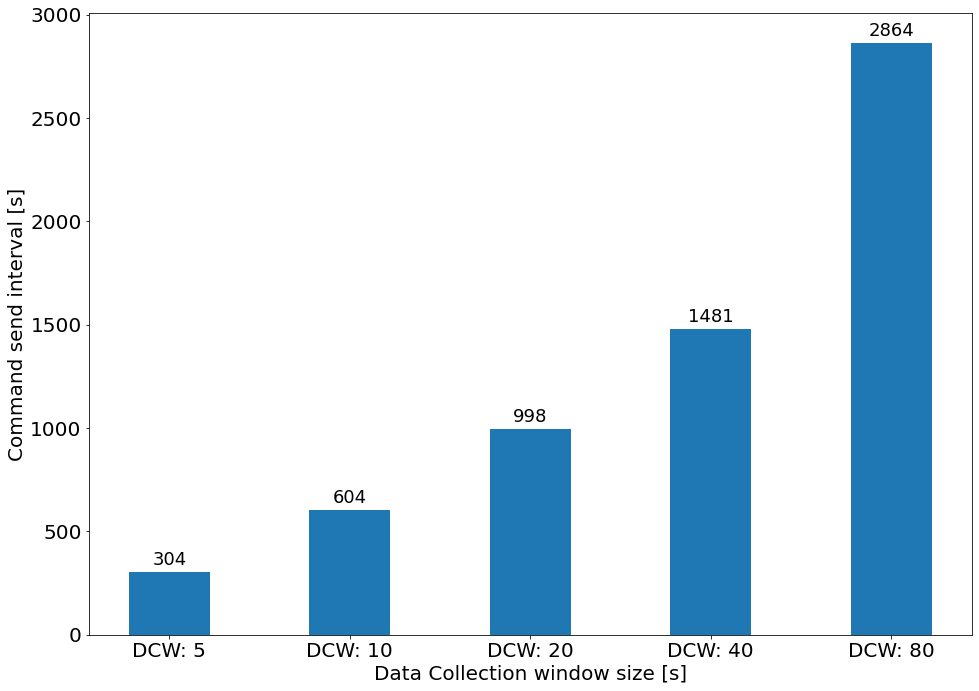

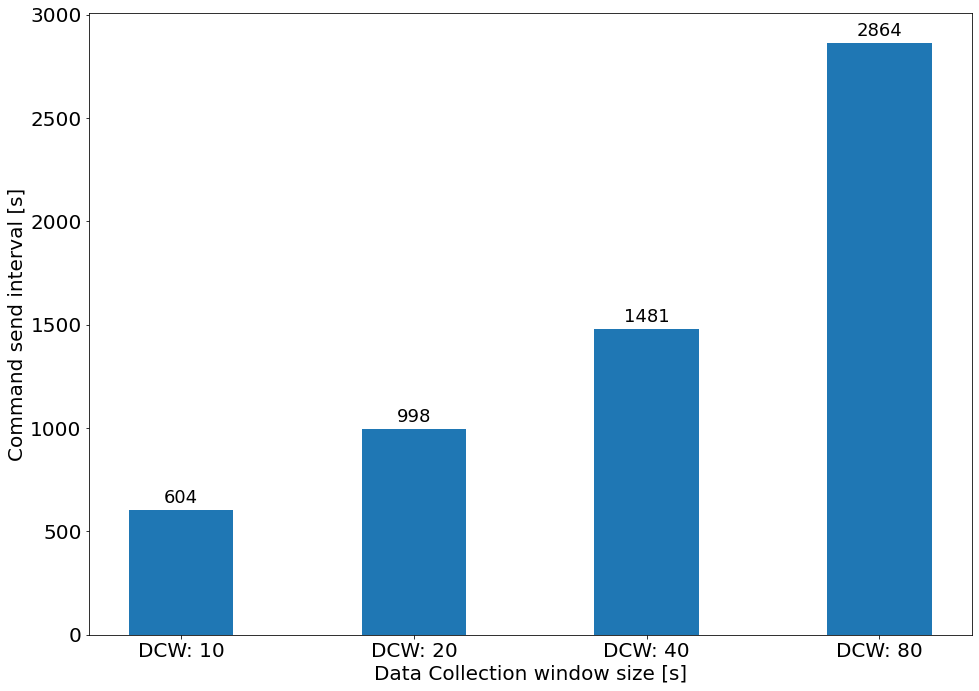

In [30]:
bytes_bar(legend, delay_dcw, 'Command send interval [s]', 'Data Collection window size [s]' , False)
bytes_bar(legend2, delay_dcw2, 'Command send interval [s]', 'Data Collection window size [s]' , False)

In [5]:
def get_data_for_nr_of_dev(nr_of_dev, energy, get_min=False):
    keys = []
    labels = []
    gw = []
    dev = []
    min_dev = []
    min_gw = []
    for disc_w in range(5, 25, 5):
        for dc_w in range(5, 25, 5):
            keys.append(f'{nr_of_dev}_{disc_w}_{dc_w}')
            labels.append(f'{disc_w} + {dc_w}')
    
    for key in keys:
        e = energy[key]
        gw.append(e[0][2])
        avg_dev_e = sum_dev_e = 0
        last_dev_id = 0
        for dev_id in e:
            if dev_id == 0:
                continue
            sum_dev_e += e[dev_id][2]
            last_dev_id = dev_id
            
        avg_dev_e = round(sum_dev_e / last_dev_id, 2)
        dev.append(avg_dev_e)
    
    if get_min:
        min_gw = min(gw)
        min_gw_label = f'{nr_of_dev}: {labels[gw.index(min_gw)]}'
        min_dev = min(dev)
        min_dev_label = f'{nr_of_dev}: {labels[dev.index(min_dev)]}'
    
        return labels, gw, dev, min_gw, min_gw_label, min_dev, min_dev_label
    return labels, gw, dev

def plot_bars(num_of_devs, labels, gw, dev):
    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, gw, width, label='GW')
    rects2 = ax.bar(x + width/2, dev, width, label='END-DEVICE')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Ah @ 5V')
    # ax.set_title('Estimated energy usage for various scenarios for a period of 365 days')
    ax.set_title(f'[{num_of_devs}] - Avg simulated battery capacity required for the device to work for a period of 365 days')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
#     ax.legend()


    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom', fontsize=18)


    autolabel(rects1)
    autolabel(rects2)

    fig.tight_layout()

    # Shrink current axis's height by 10% on the bottom
    box = ax.get_position()
    ax.set_position([box.x0, box.y0 + box.height * 0.1,
                     box.width, box.height * 0.9])

    # Put a legend below current axis
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
              fancybox=True, shadow=True, ncol=5)
    
    plt.show()
    
def plot_gw_bars(labels, gw):
    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(x, gw, width, label='GW')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Ah @ 5V')
    # ax.set_title('Estimated energy usage for various scenarios for a period of 365 days')
    ax.set_title(f'[{num_of_devs}] - Min simulated battery capacity required for the GW to work for a period of 365 days')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
#     ax.legend()


    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom', fontsize=18)


    autolabel(rects1)

    fig.tight_layout()

    # Shrink current axis's height by 10% on the bottom
    box = ax.get_position()
    ax.set_position([box.x0, box.y0 + box.height * 0.1,
                     box.width, box.height * 0.9])

    # Put a legend below current axis
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
              fancybox=True, shadow=True, ncol=5)
    
    plt.show()
    
def plot_dev_bars(labels, dev):
    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(x, dev, width, label='DEV')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Ah @ 5V')
    # ax.set_title('Estimated energy usage for various scenarios for a period of 365 days')
    ax.set_title(f'[{num_of_devs}] - Min simulated battery capacity required for the end-device to work for a period of 365 days')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
#     ax.legend()


    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom', fontsize=18)


    autolabel(rects1)

    fig.tight_layout()

    # Shrink current axis's height by 10% on the bottom
    box = ax.get_position()
    ax.set_position([box.x0, box.y0 + box.height * 0.1,
                     box.width, box.height * 0.9])

    # Put a legend below current axis
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
              fancybox=True, shadow=True, ncol=5)
    
    plt.show()

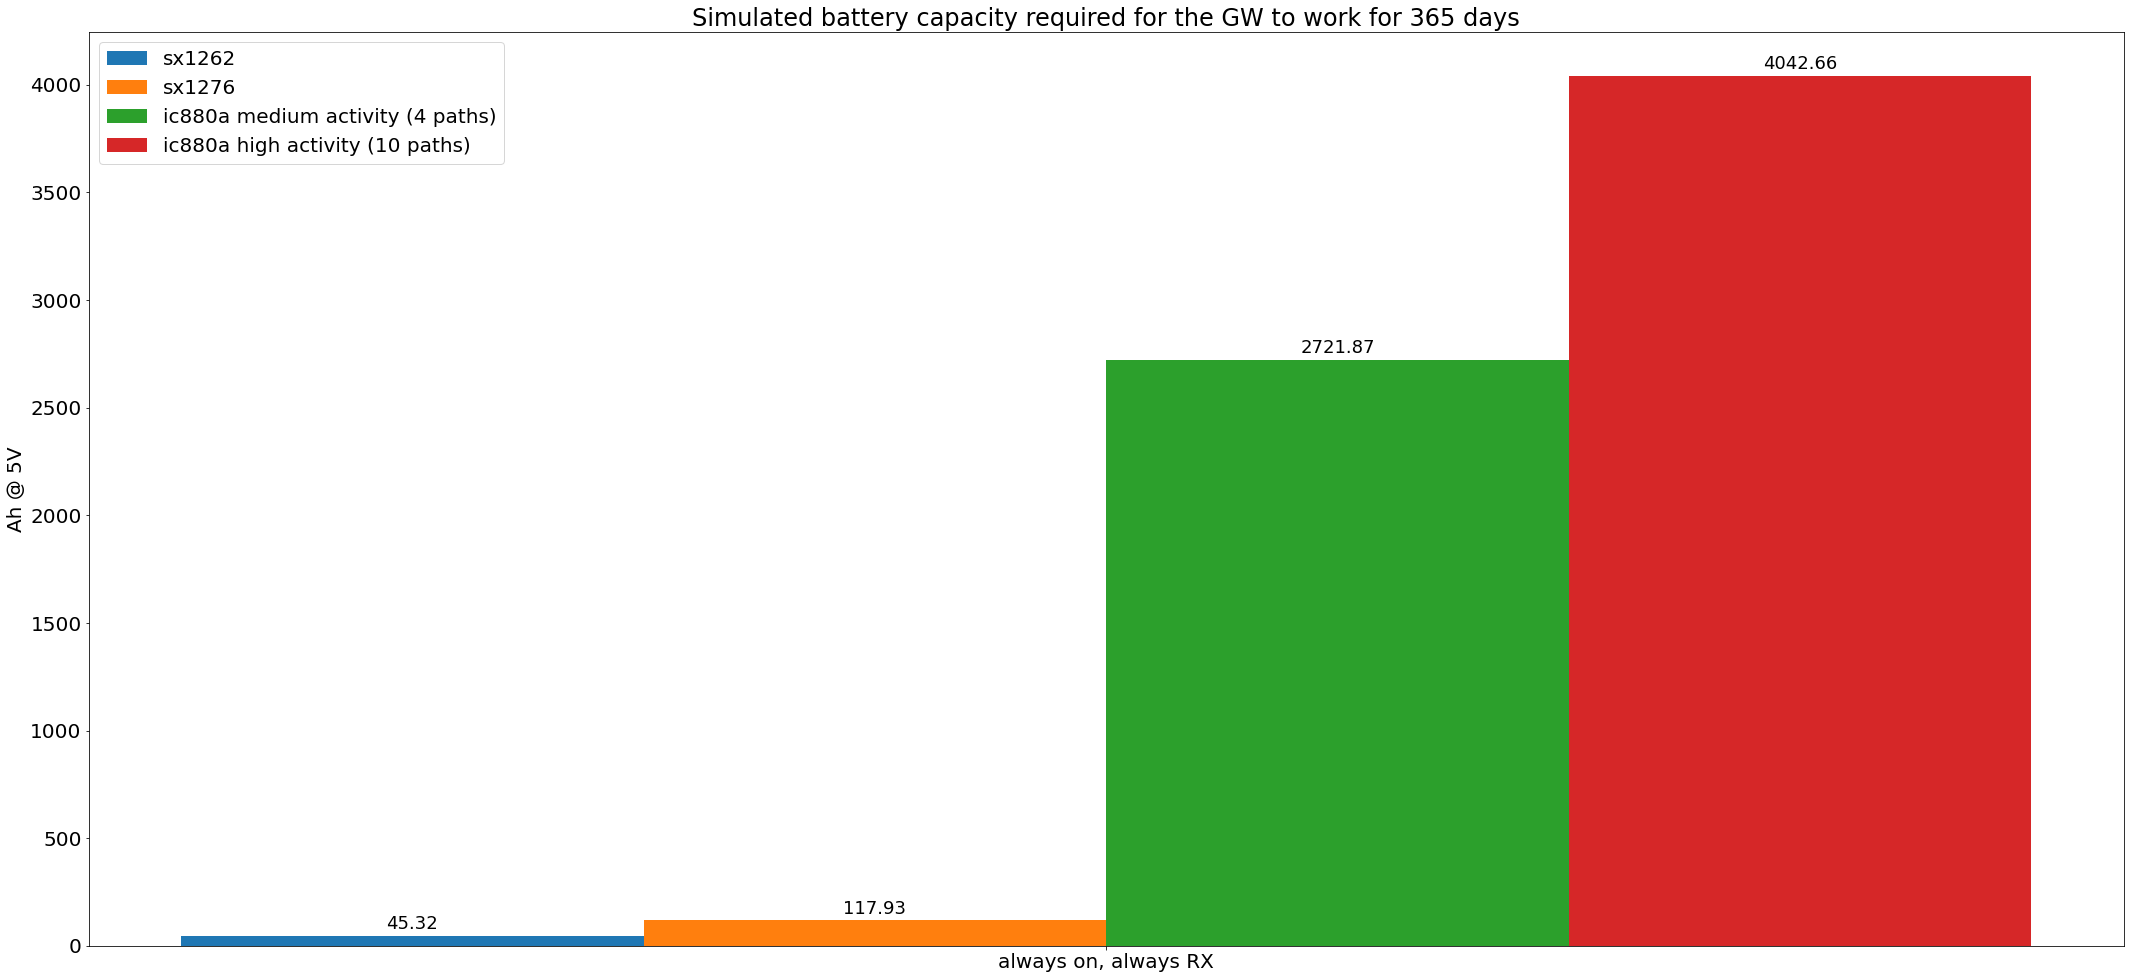

In [6]:
labels = ['always on, always RX']
sx1262 = [45.32]
sx1276 = [117.93]
ic880a_4 = [2721.87]
ic880a_10 = [4042.66]

x = np.arange(len(labels))  # the label locations
width = 0.1  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - 1.5*width, sx1262, width, label='sx1262')
rects2 = ax.bar(x - 0.5*width, sx1276, width, label='sx1276')
rects3 = ax.bar(x + 0.5*width, ic880a_4, width, label='ic880a medium activity (4 paths)')
rects4 = ax.bar(x + 1.5*width, ic880a_10, width, label='ic880a high activity (10 paths)')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Ah @ 5V')
# ax.set_title('Simulated energy usage for a GW for 365 days of opearations')
ax.set_title('Simulated battery capacity required for the GW to work for 365 days')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=18)


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

fig.tight_layout()

plt.show()

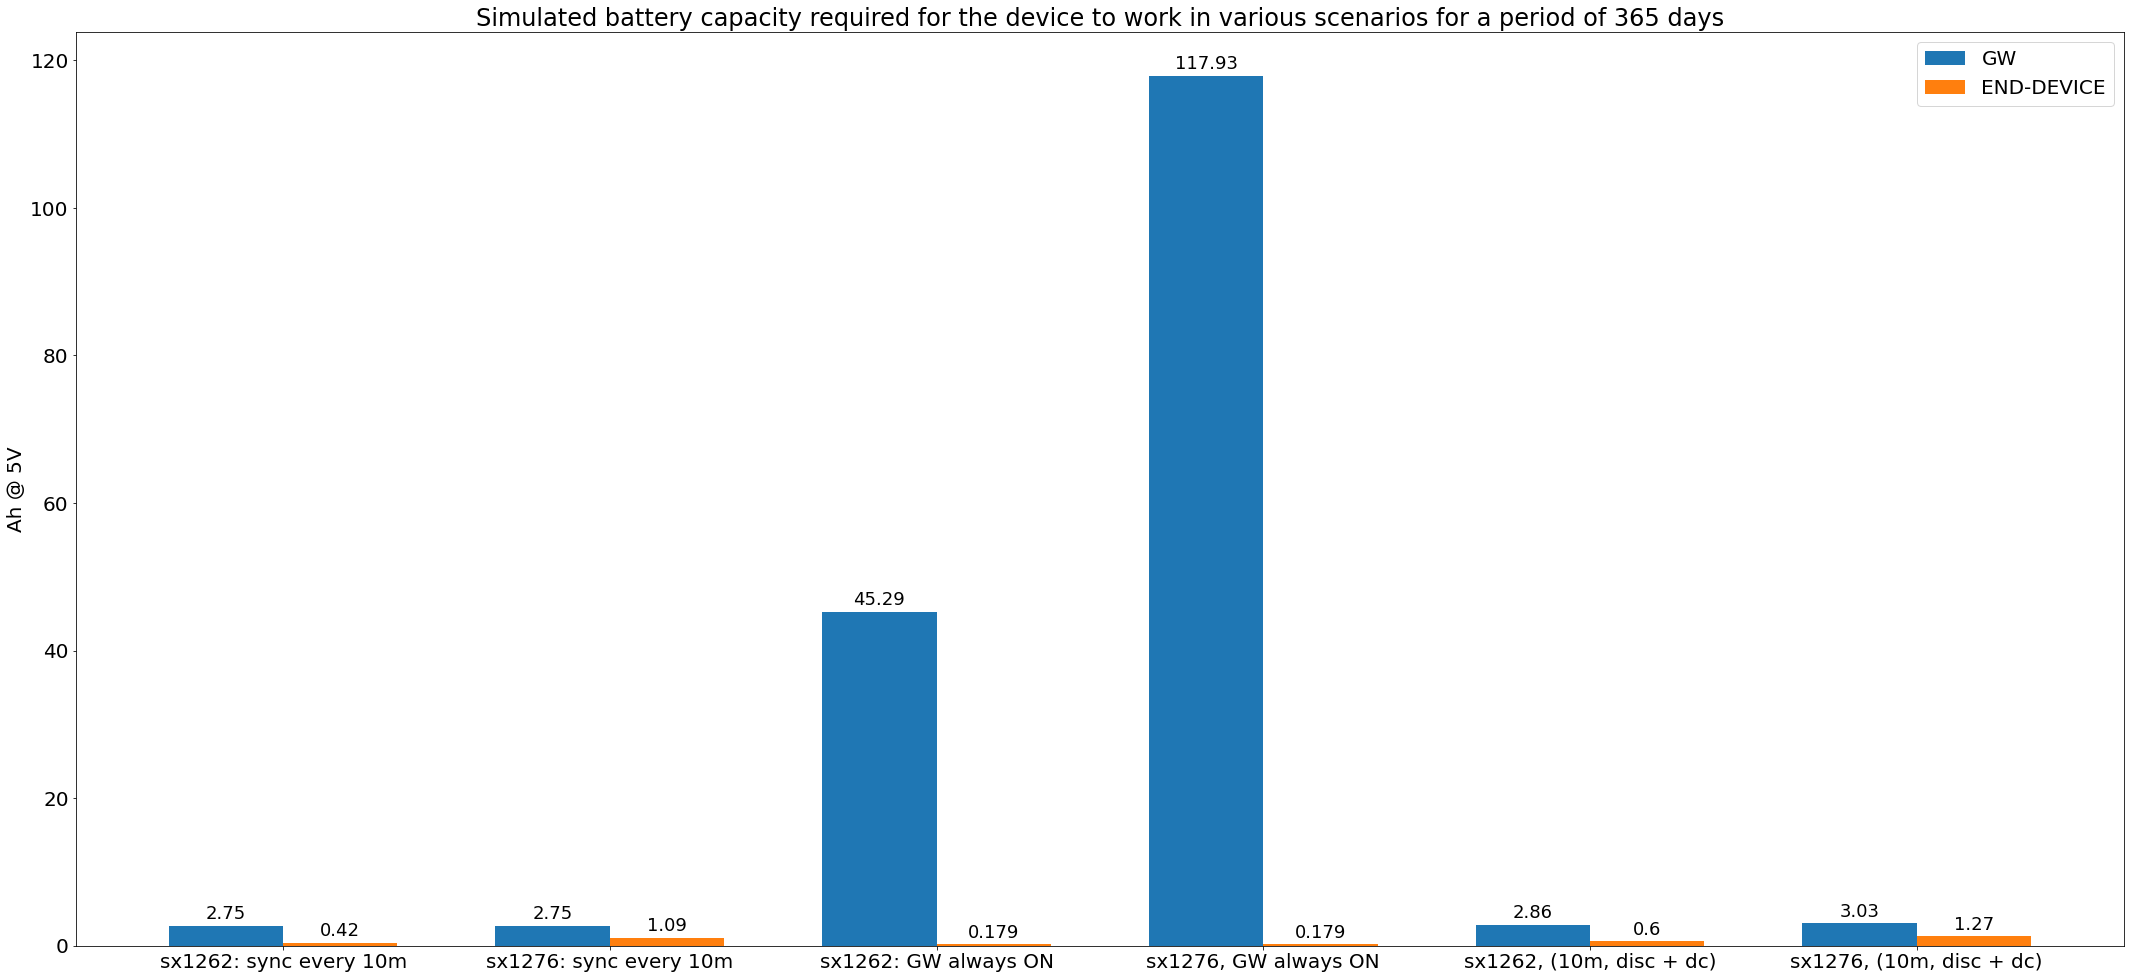

In [7]:
labels = ['sx1262: sync every 10m', 'sx1276: sync every 10m', 'sx1262: GW always ON', 'sx1276, GW always ON', 'sx1262, (10m, disc + dc)', 'sx1276, (10m, disc + dc)']
gw = [2.75, 2.75, 45.29, 117.93, 2.86, 3.03]
dev = [0.42, 1.09, 0.179, 0.179, 0.60, 1.27]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, gw, width, label='GW')
rects2 = ax.bar(x + width/2, dev, width, label='END-DEVICE')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Ah @ 5V')
# ax.set_title('Estimated energy usage for various scenarios for a period of 365 days')
ax.set_title('Simulated battery capacity required for the device to work in various scenarios for a period of 365 days')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=18)


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

In [61]:
def get_data_for_nr_of_dev_hor(nr_of_dev, energy, radio):
    keys = []
    labels = []
    gw = []
    dev = []
    std_dev = []
    
    for disc_w in range(5, 25, 5):
        for dc_w in range(5, 25, 5):
            keys.append(f'{nr_of_dev}_{disc_w}_{dc_w}')
            labels.append(f'[{nr_of_dev}][{radio}]: {disc_w} + {dc_w}')
    
    for key in keys:
        e = energy[key]
        gw.append(e[0][2])
        avg_dev_e = sum_dev_e = std_dev_e = 0
        dev_e = []
        last_dev_id = 0
        for dev_id in e:
            if dev_id == 0:
                continue
            dev_e.append(e[dev_id][2])
            sum_dev_e += e[dev_id][2]
            last_dev_id = dev_id
            
        std_dev_e = stdev(dev_e)
        avg_dev_e = round(sum_dev_e / last_dev_id, 2)
        dev.append(avg_dev_e)
        std_dev.append(std_dev_e)

    return labels, gw, dev, std_dev

def get_data_for_send_delay_hor(energy, stats):
    keys = []
    labels = []
    gw = []
    dev = []
    std_dev = []
    
    radios = ['sx1262', 'sx1276']
    for radio in radios:
        for send_interval in range(600, 3601, 600):
            for disc_every_n in range(25, 101, 25):
                keys.append(f'{radio}_{send_interval}_{disc_every_n}')
                
    for key in keys:
        radio, send_i, disc_every_n = key.split('_')
        send_i = int(send_i)
        disc_every_n = int(disc_every_n)
        e = energy[key]
        s = stats[key]
        gw_s = s[0]
        gw.append(e[0][2])
        avg_dev_e = sum_dev_e = std_dev_e = 0
        dev_e = []
        dev_ps = dev_bs = dev_pr = dev_br = 0
        avg_ps = avg_bs = avg_pr = avg_br = 0
        last_dev_id = 0
        for dev_id in e:
            if dev_id == 0:
                continue
            dev_e.append(e[dev_id][2])
            sum_dev_e += e[dev_id][2]
            dev_ps += s[dev_id][0]
            dev_bs += s[dev_id][1]
            dev_pr += s[dev_id][2]
            dev_br += s[dev_id][3]
            last_dev_id = dev_id
            
        std_dev_e = stdev(dev_e)
        avg_dev_e = int(round(sum_dev_e / last_dev_id, 0))
        avg_ps = int(round(dev_ps / last_dev_id, 0))
        avg_bs = round(dev_bs / last_dev_id / 1024.0, 2)
        avg_pr = int(round(dev_pr / last_dev_id, 0))
        avg_br = round(dev_br / last_dev_id / 1024.0, 2)
        dev.append(avg_dev_e)
        std_dev.append(std_dev_e)
        labels.append(f'[{radio}]: delay {send_i}s | cmd every: {disc_every_n}\n [4p e {round((send_interval * disc_every_n)/3600, 2)}h, S: {avg_ps}, {avg_bs}KB. R: {avg_pr}, {avg_br}KB]')

    return labels, gw, dev, std_dev

def plot_hor_bars(labels, gw, dev, std_dev, title, f_size=extended_fig_size, text_color='white'):
    plt.rcParams['figure.figsize'] = f_size
    fig, ax = plt.subplots()

    y_pos = np.arange(len(labels))
    width = 0.4

    react1 = ax.barh(y_pos, dev, width, xerr=std_dev, label='End-Dev')
    react2 = ax.barh(y_pos + width, gw, width, label='GW')
    ax.set(yticks=y_pos + width, yticklabels=labels, ylim=[2*width - 1, len(labels)])
    
    ax.set_yticks(y_pos)
    ax.set_yticklabels(labels)
    ax.invert_yaxis()  # labels read top-to-bottom
    ax.set_xlabel('mAh @ 5V')
    ax.set_title(title)
    
    # Shrink current axis's height by 10% on the bottom
    box = ax.get_position()
    if f_size[1] < 65:
        ax.set_position([box.x0, box.y0 + box.height * 0.05,
                         box.width, box.height * 0.95])

        # Put a legend below current axis
        ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
                  fancybox=True, shadow=True, ncol=5)

    else:
        ax.set_position([box.x0, box.y0 + box.height * 0.01,
                 box.width, box.height * 0.99])

        # Put a legend below current axis
        ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.01),
                  fancybox=True, shadow=True, ncol=5)
        
    for i, v in enumerate(dev):
        ax.text(int(v/2) - 40, i + .075, str(v), color=text_color, fontweight='bold')
        ax.text(int(gw[i]/2) - 40, i + 0.475, str(gw[i]), color=text_color, fontweight='bold')
    
    plt.show()
    plt.rcParams['figure.figsize'] = default_fig_size

def merge(a):
    b = []
    for x in a:
        b += x
        
    return b

def sort_by_first(a, b, c, d):
    zipped = sorted(zip(a, b, c, d))
    a, b, c, d = zip(*zipped)
    
    return a, b, c, d

# Experiment: number of devices, discovery window, data capture window

## sx1276

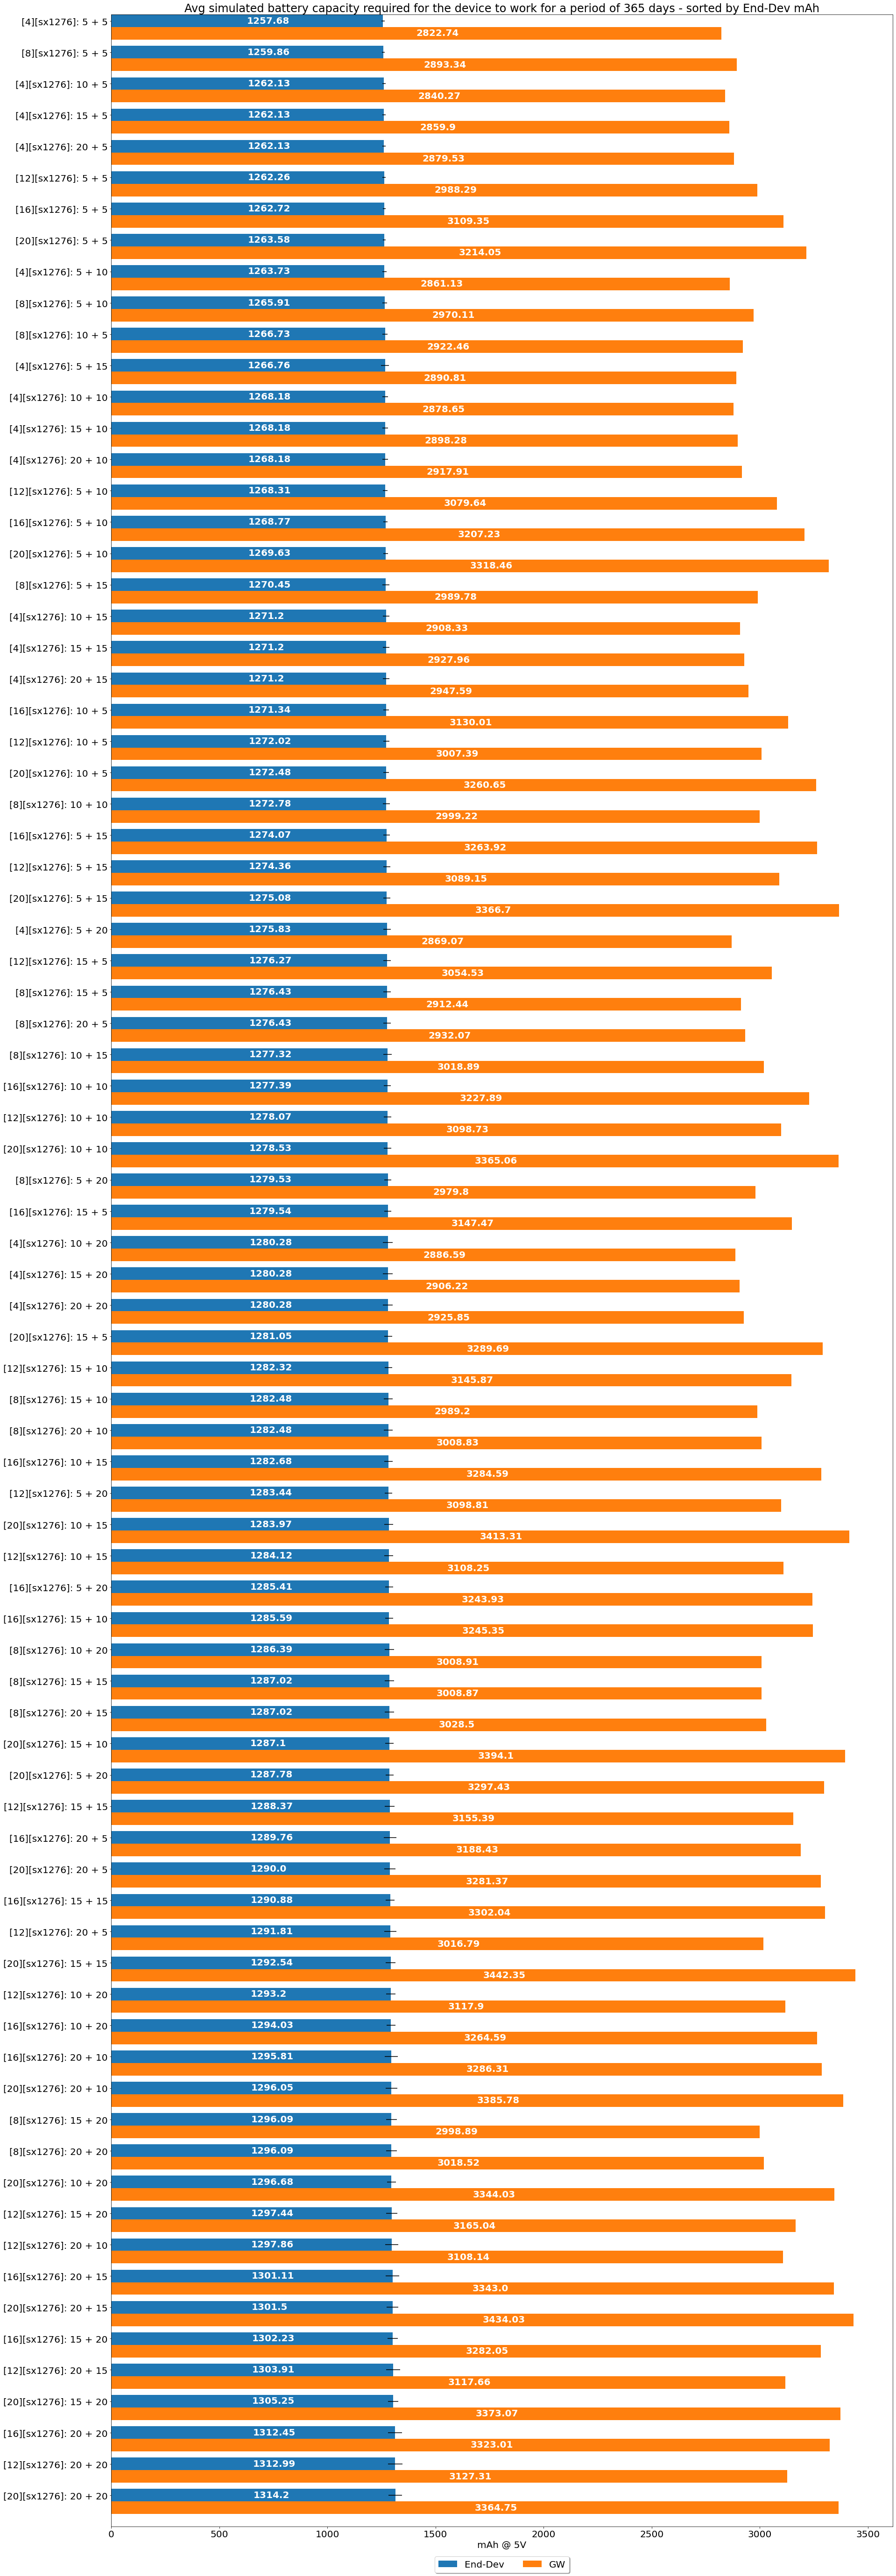

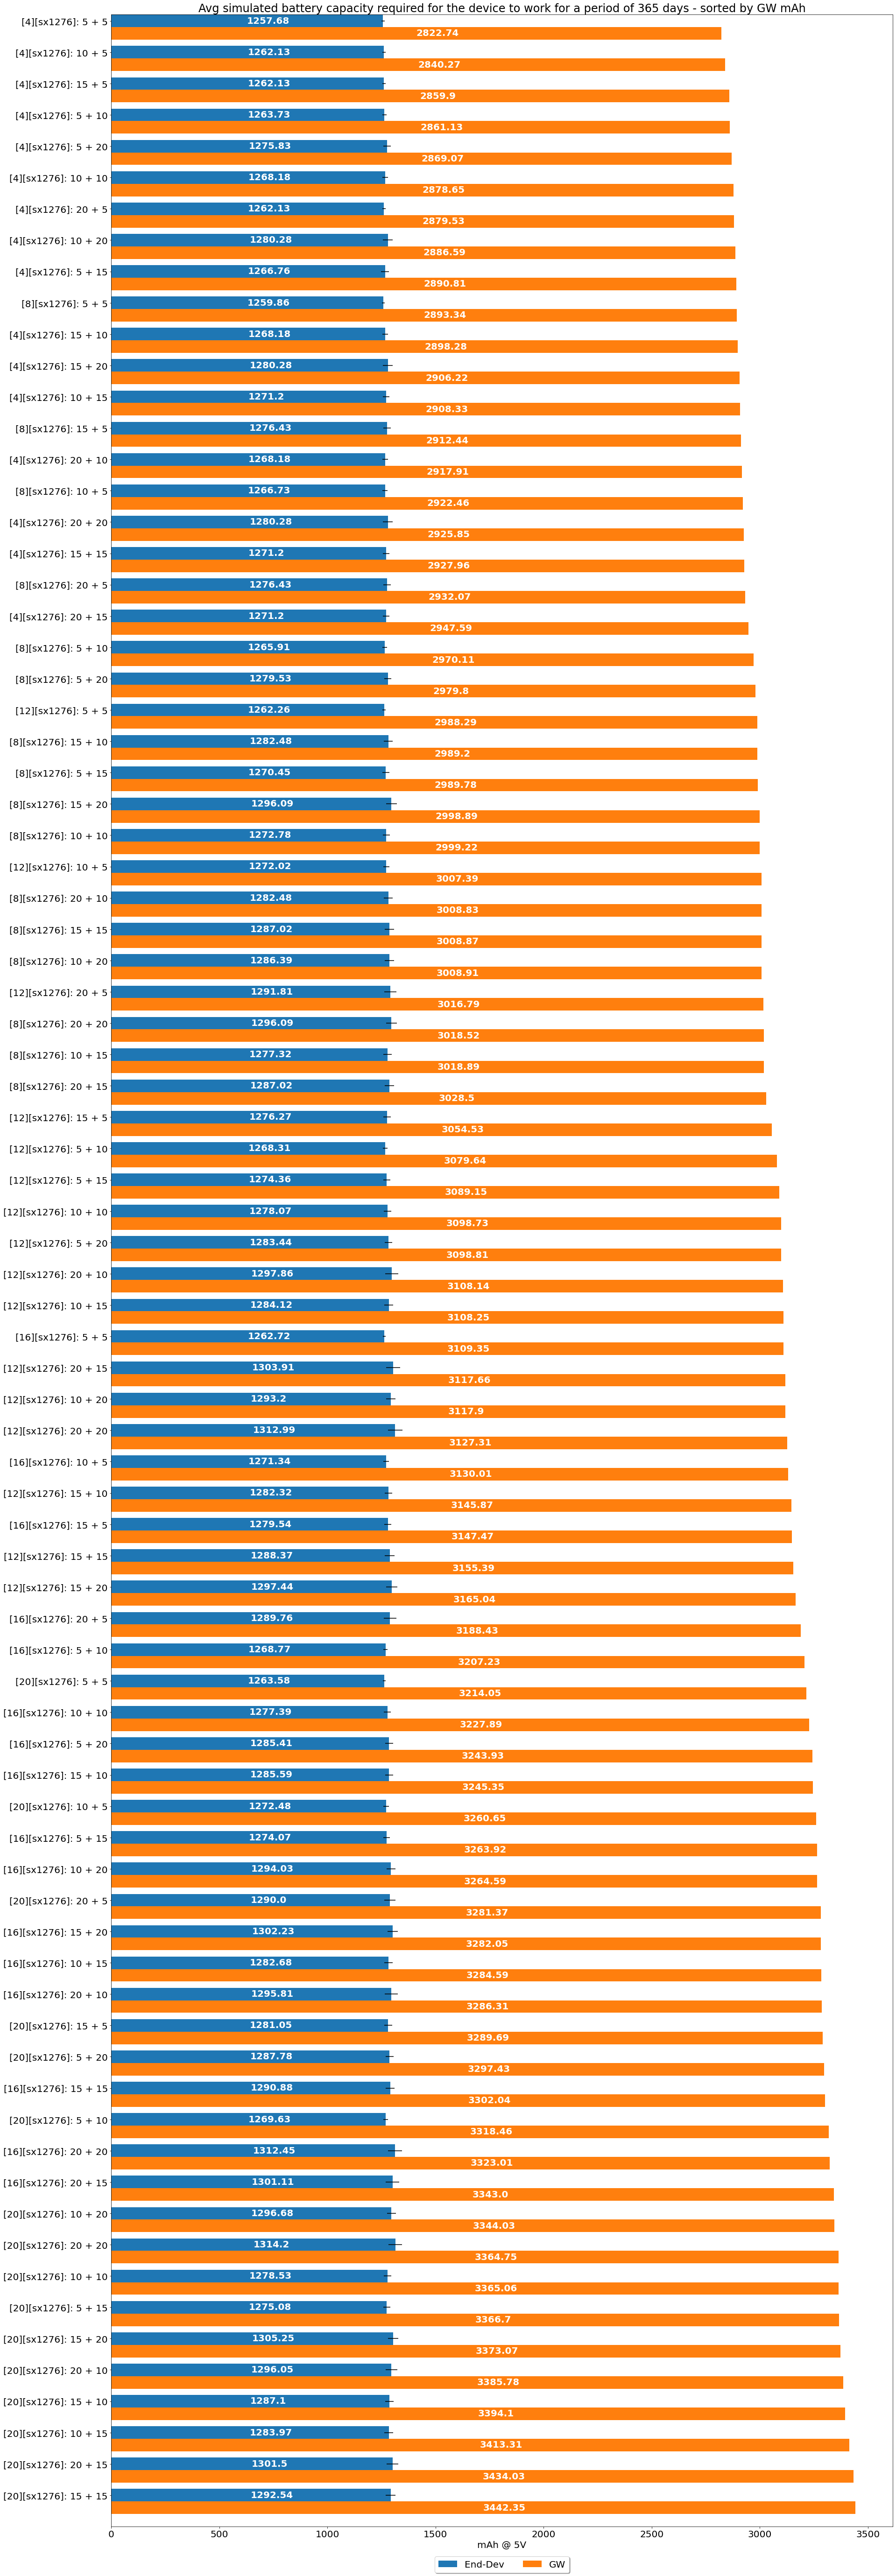

In [11]:
data_dir = '/mnt/green/lora_wakeup'
data_sx1276 = f'{data_dir}/sx1276_dw_dcw'

labels_all = []
gw_all = []
dev_all = []
std_dev_all = []

for num_of_devs in range(4, 24, 4):
    energy, _ = extract_data(num_of_devs, data_sx1276, 31536000)
    labels, gw, dev, std_dev = get_data_for_nr_of_dev_hor(num_of_devs, energy, 'sx1276')
    labels_all.append(labels)
    gw_all.append(gw)
    dev_all.append(dev)
    std_dev_all.append(std_dev)
    
sx1276_labels = merge(labels_all)
sx1276_gw = merge(gw_all)
sx1276_dev = merge(dev_all)
sx1276_std_dev = merge(std_dev_all)

sx1276_dev, sx1276_labels, sx1276_gw, sx1276_std_dev = sort_by_first(sx1276_dev, sx1276_labels, sx1276_gw, sx1276_std_dev)
plot_hor_bars(sx1276_labels, sx1276_gw, sx1276_dev, sx1276_std_dev, 'Avg simulated battery capacity required for the device to work for a period of 365 days - sorted by End-Dev mAh')

sx1276_gw, sx1276_labels, sx1276_dev, sx1276_std_dev = sort_by_first(sx1276_gw, sx1276_labels, sx1276_dev, sx1276_std_dev)
plot_hor_bars(sx1276_labels, sx1276_gw, sx1276_dev, sx1276_std_dev, 'Avg simulated battery capacity required for the device to work for a period of 365 days - sorted by GW mAh')

### Min energy usage configurations

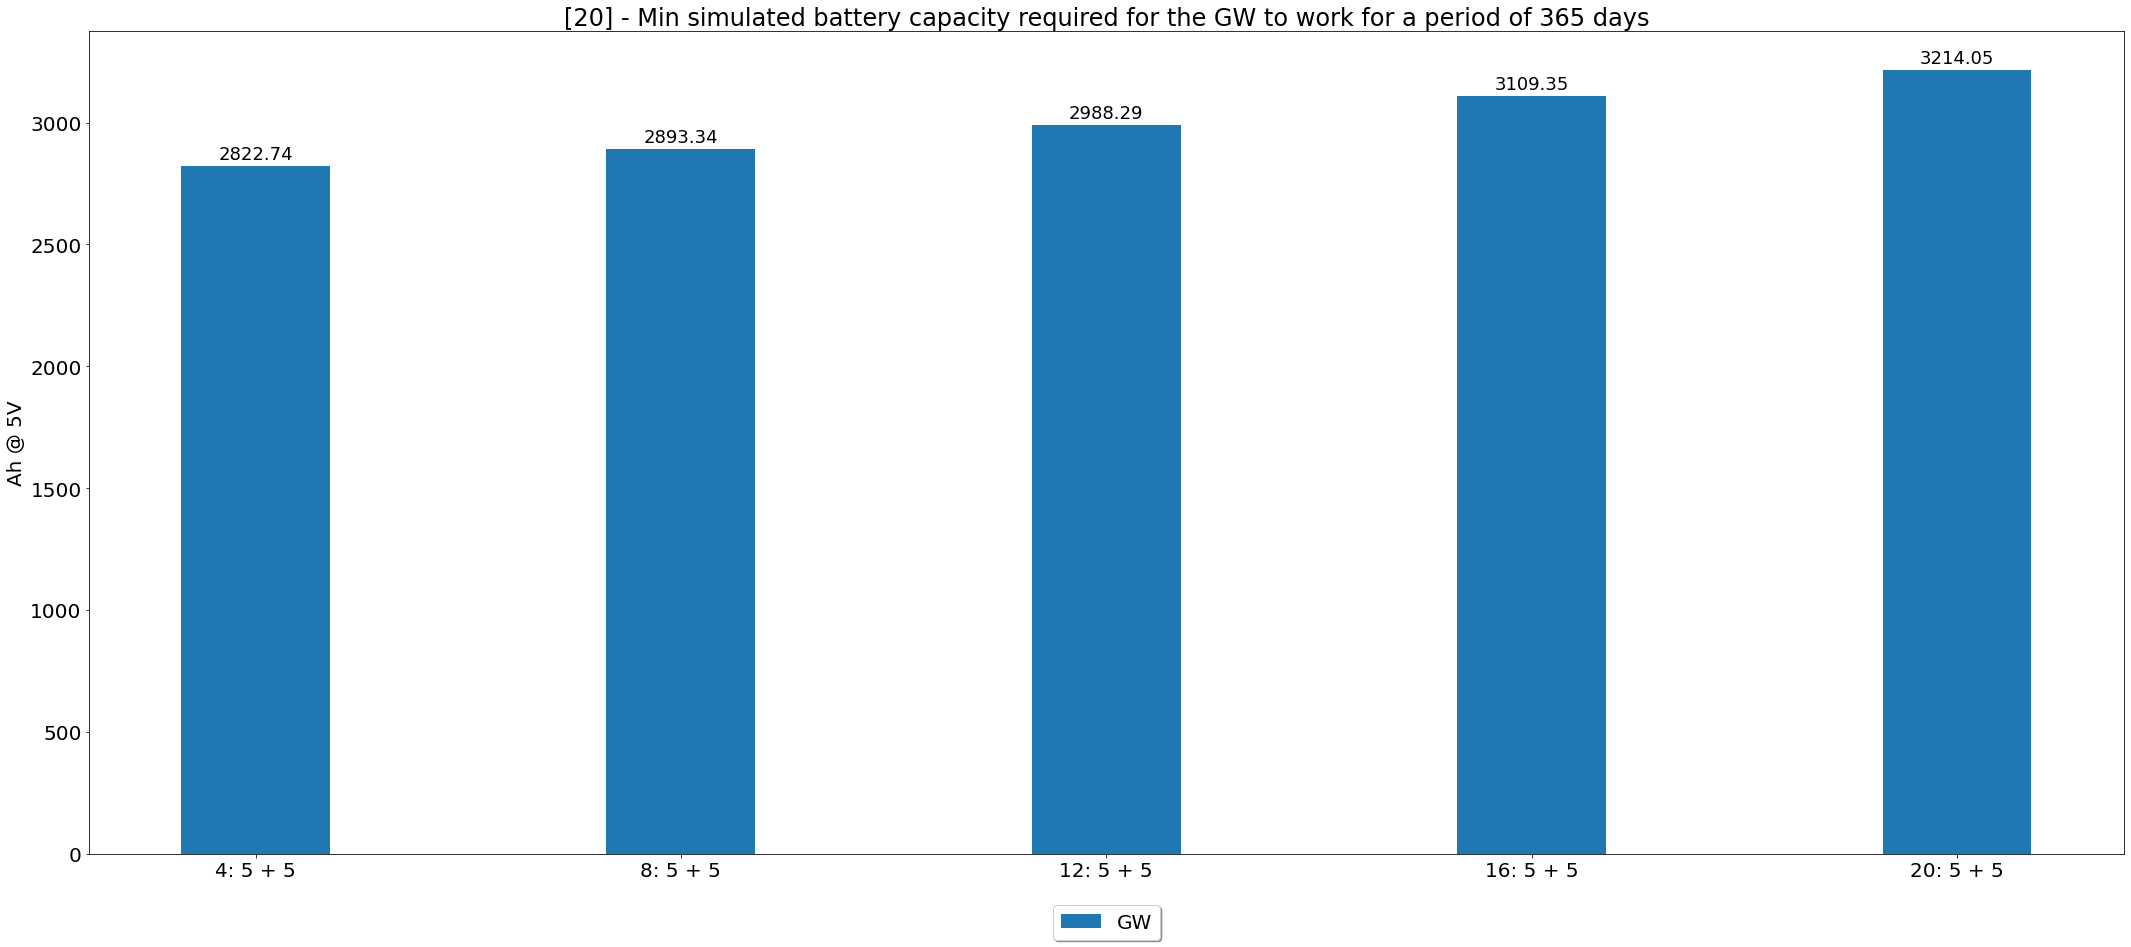

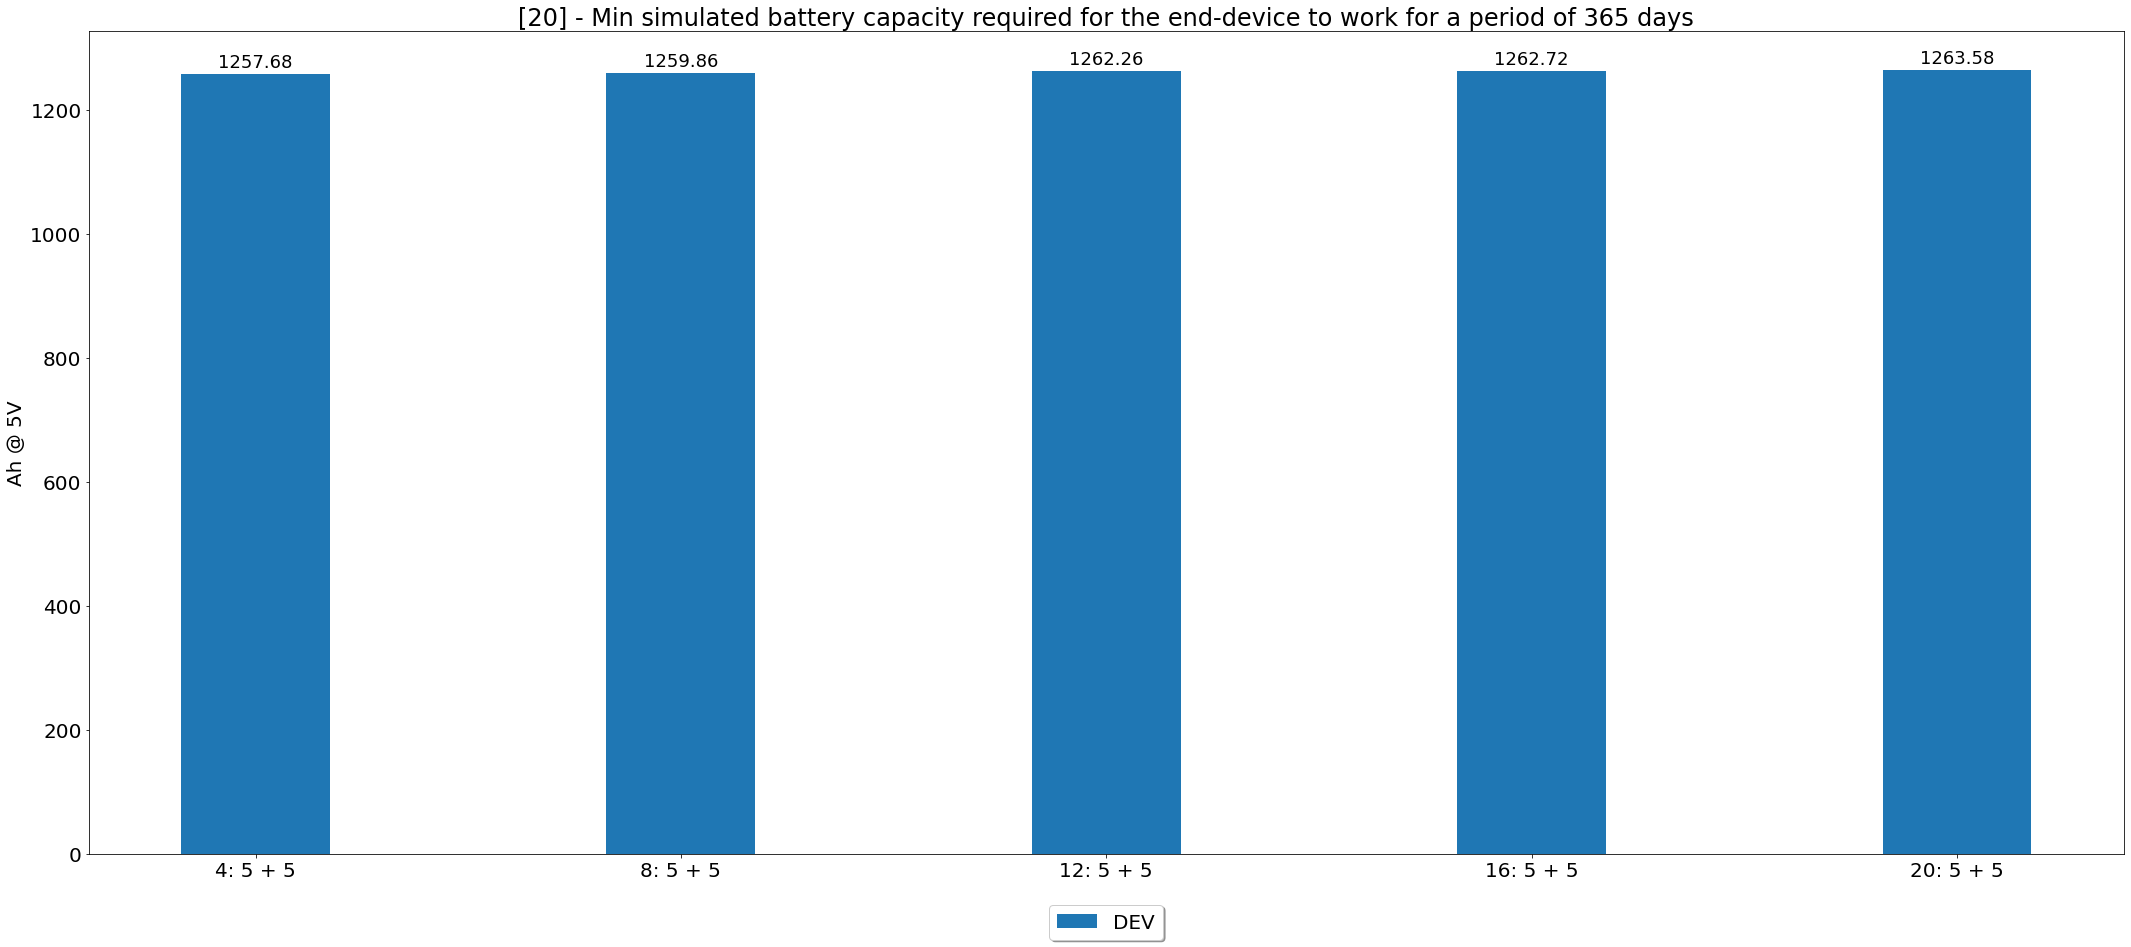

In [12]:
min_labels_gw = []
min_labels_dev = []
min_gw = []
min_dev = []

for num_of_devs in range(4, 24, 4):
    energy, _ = extract_data(num_of_devs, data_sx1276, 31536000)
    _, _, _, mgw, mgw_l, mdev, mdev_l = get_data_for_nr_of_dev(num_of_devs, energy, True)

    min_gw.append(mgw)
    min_labels_gw.append(mgw_l)
    min_dev.append(mdev)
    min_labels_dev.append(mdev_l)

#     plot_bars(num_of_devs, labels, gw, dev)

plot_gw_bars(min_labels_gw, min_gw)
plot_dev_bars(min_labels_dev, min_dev)

## SX1262

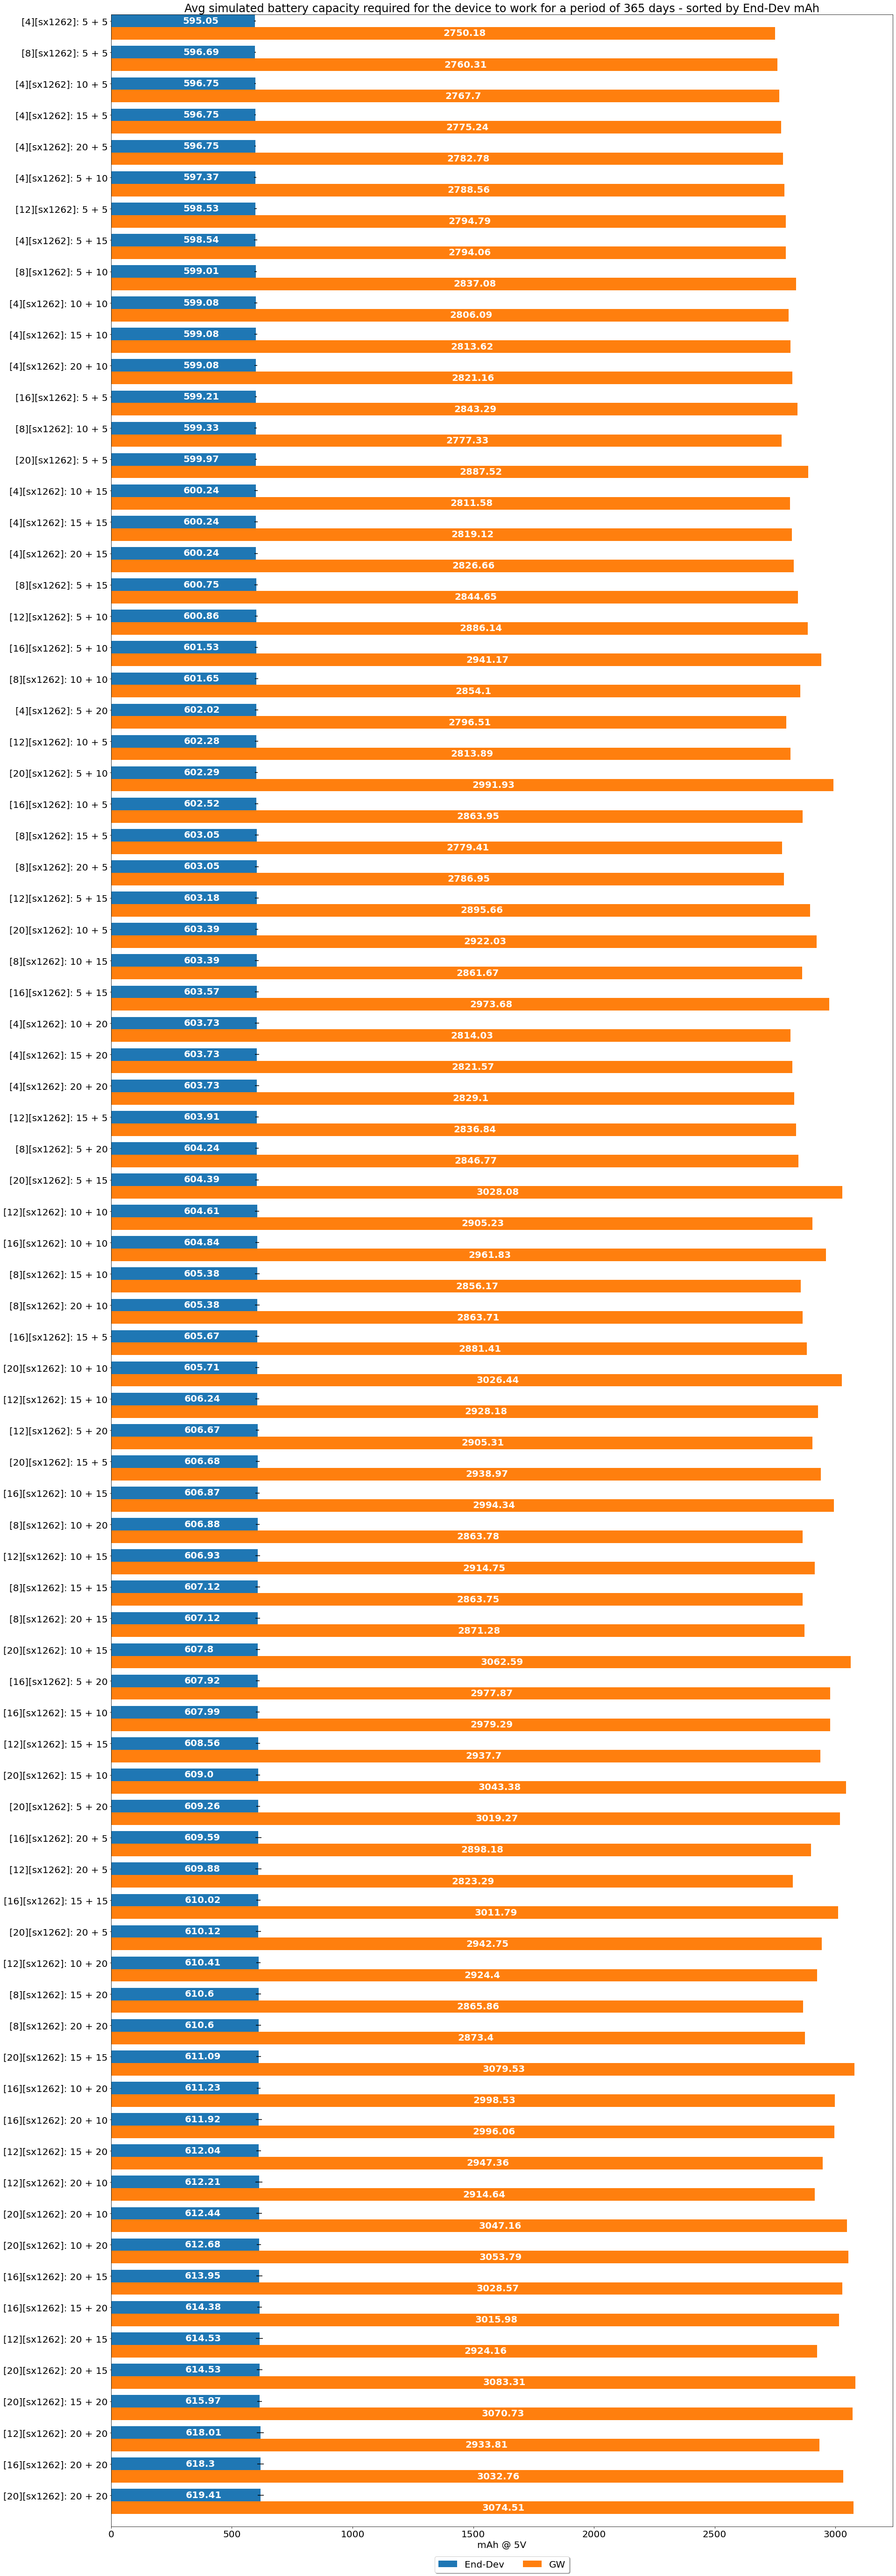

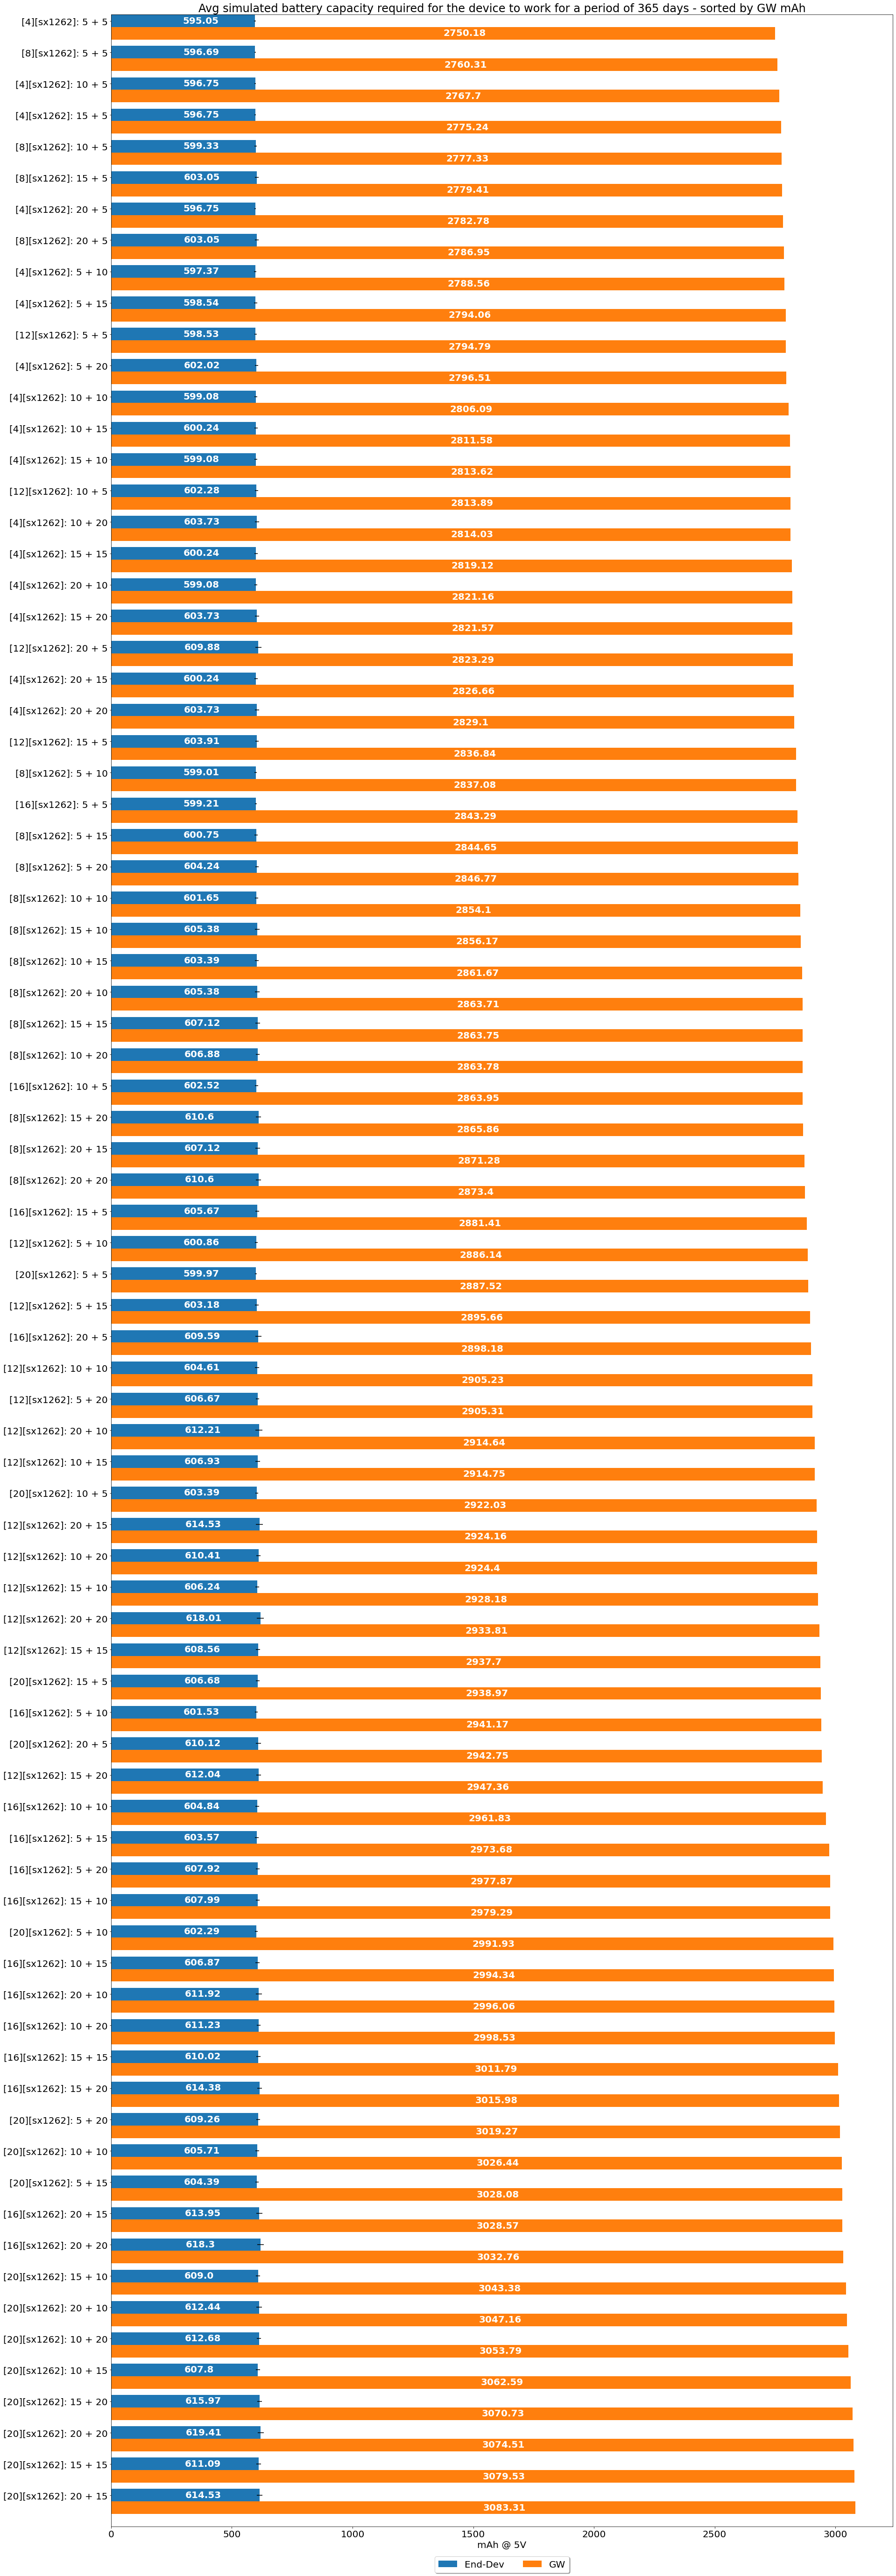

In [13]:
data_dir = '/mnt/green/lora_wakeup'
data_sx1262 = f'{data_dir}/sx1262_dw_dcw'

labels_all = []
gw_all = []
dev_all = []
std_dev_all = []

for num_of_devs in range(4, 24, 4):
    energy, _ = extract_data(num_of_devs, data_sx1262, 31536000)
    labels, gw, dev, std_dev = get_data_for_nr_of_dev_hor(num_of_devs, energy, 'sx1262')
    labels_all.append(labels)
    gw_all.append(gw)
    dev_all.append(dev)
    std_dev_all.append(std_dev)
    
sx1262_labels = merge(labels_all)
sx1262_gw = merge(gw_all)
sx1262_dev = merge(dev_all)
sx1262_std_dev = merge(std_dev_all)

sx1262_dev, sx1262_labels, sx1262_gw, sx1262_std_dev = sort_by_first(sx1262_dev, sx1262_labels, sx1262_gw, sx1262_std_dev)
plot_hor_bars(sx1262_labels, sx1262_gw, sx1262_dev, sx1262_std_dev, 'Avg simulated battery capacity required for the device to work for a period of 365 days - sorted by End-Dev mAh')

sx1262_gw, sx1262_labels, sx1262_dev, sx1262_std_dev = sort_by_first(sx1262_gw, sx1262_labels, sx1262_dev, sx1262_std_dev)
plot_hor_bars(sx1262_labels, sx1262_gw, sx1262_dev, sx1262_std_dev, 'Avg simulated battery capacity required for the device to work for a period of 365 days - sorted by GW mAh')

### Min energy usage configurations

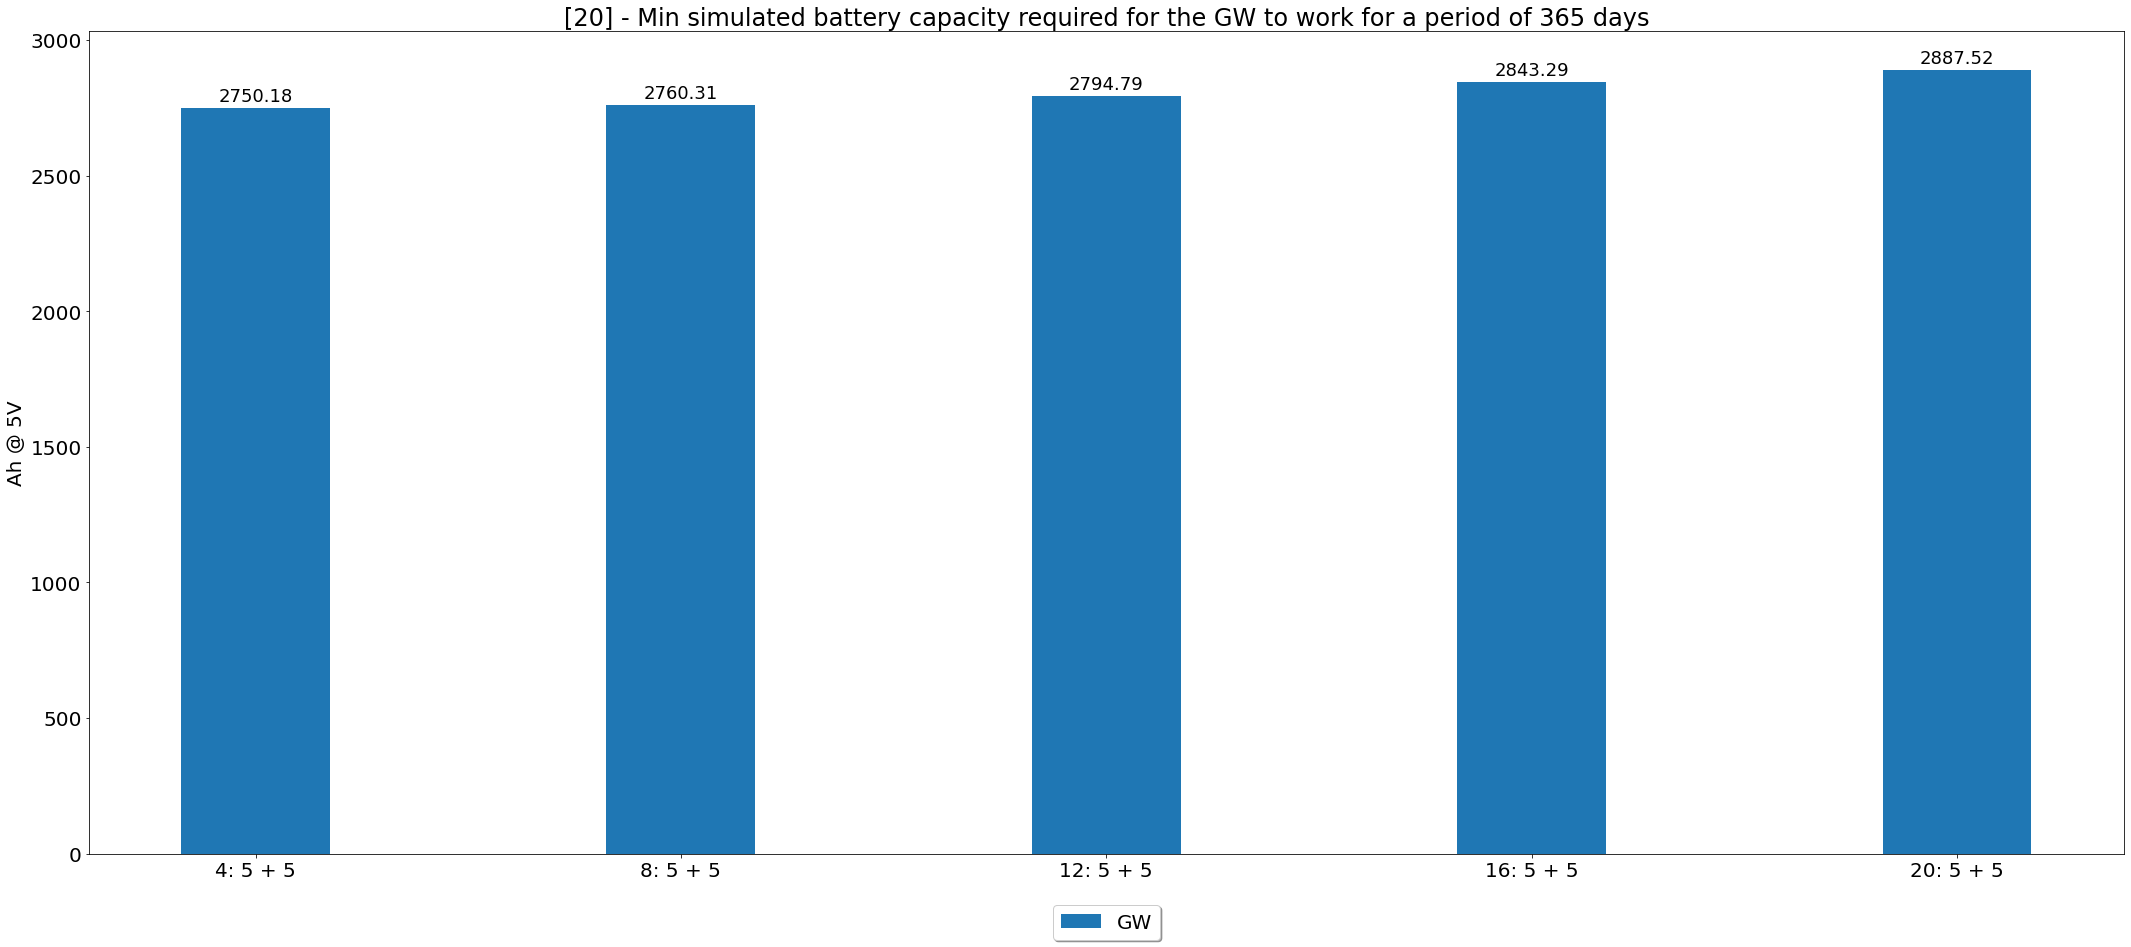

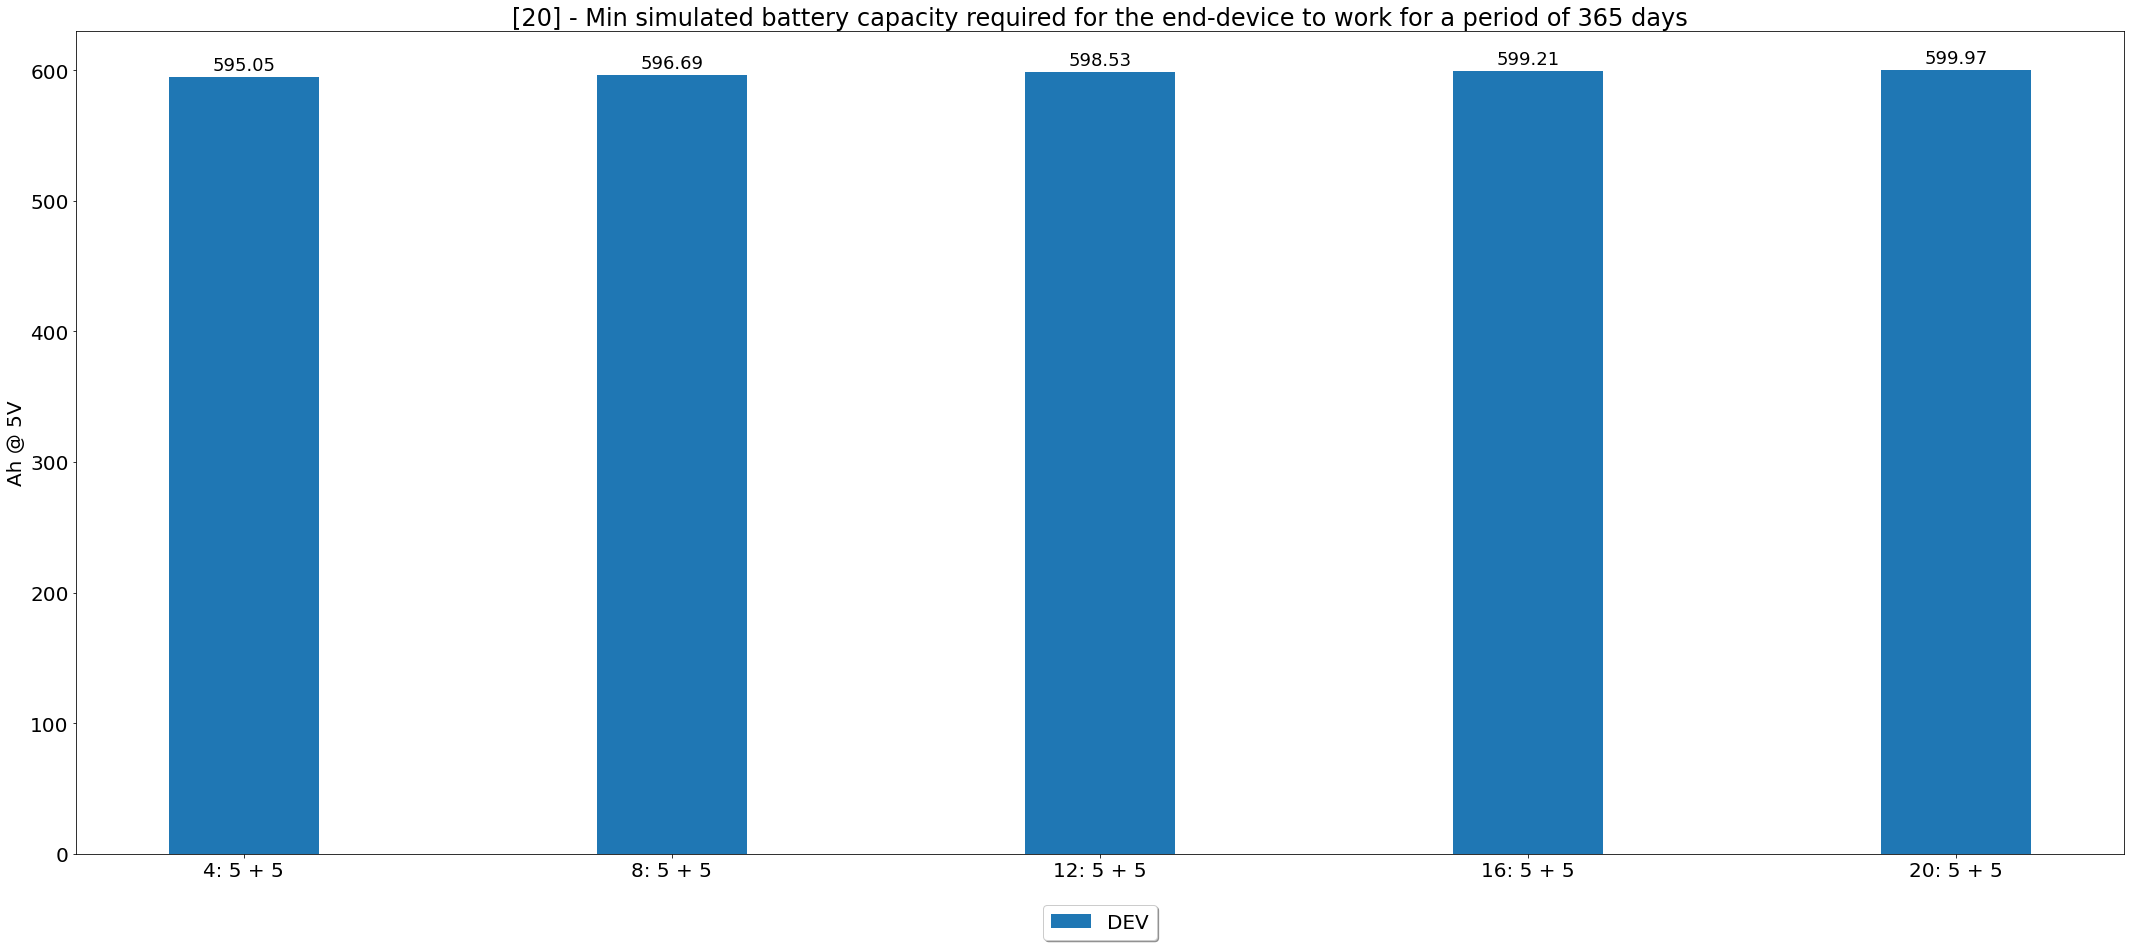

In [14]:
min_labels_gw = []
min_labels_dev = []
min_gw = []
min_dev = []

for num_of_devs in range(4, 24, 4):
    energy, _ = extract_data(num_of_devs, data_sx1262, 31536000)
    _, _, _, mgw, mgw_l, mdev, mdev_l = get_data_for_nr_of_dev(num_of_devs, energy, True)

    min_gw.append(mgw)
    min_labels_gw.append(mgw_l)
    min_dev.append(mdev)
    min_labels_dev.append(mdev_l)

#     plot_bars(num_of_devs, labels, gw, dev)

plot_gw_bars(min_labels_gw, min_gw)
plot_dev_bars(min_labels_dev, min_dev)

## SX1262 + SX1276

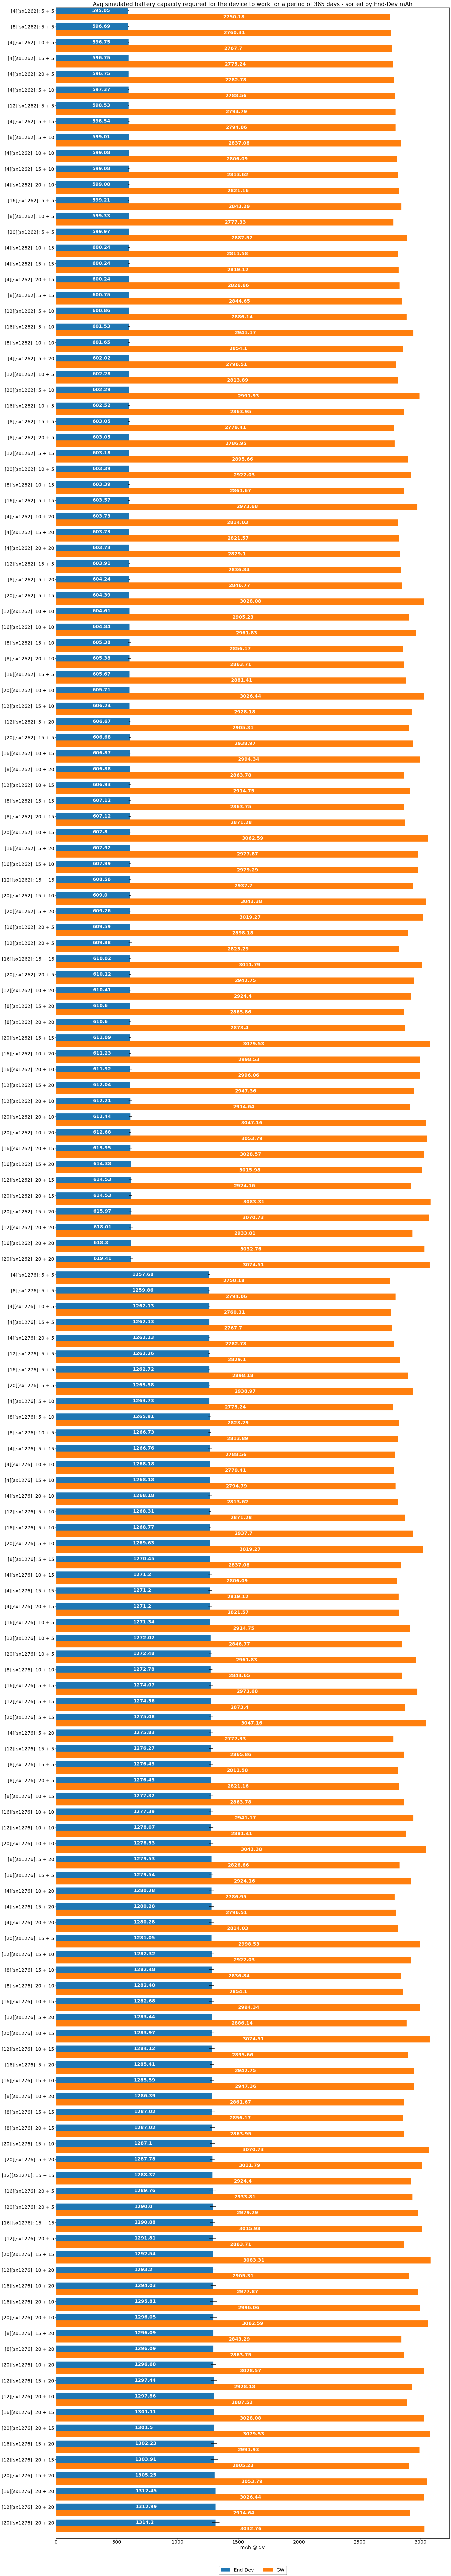

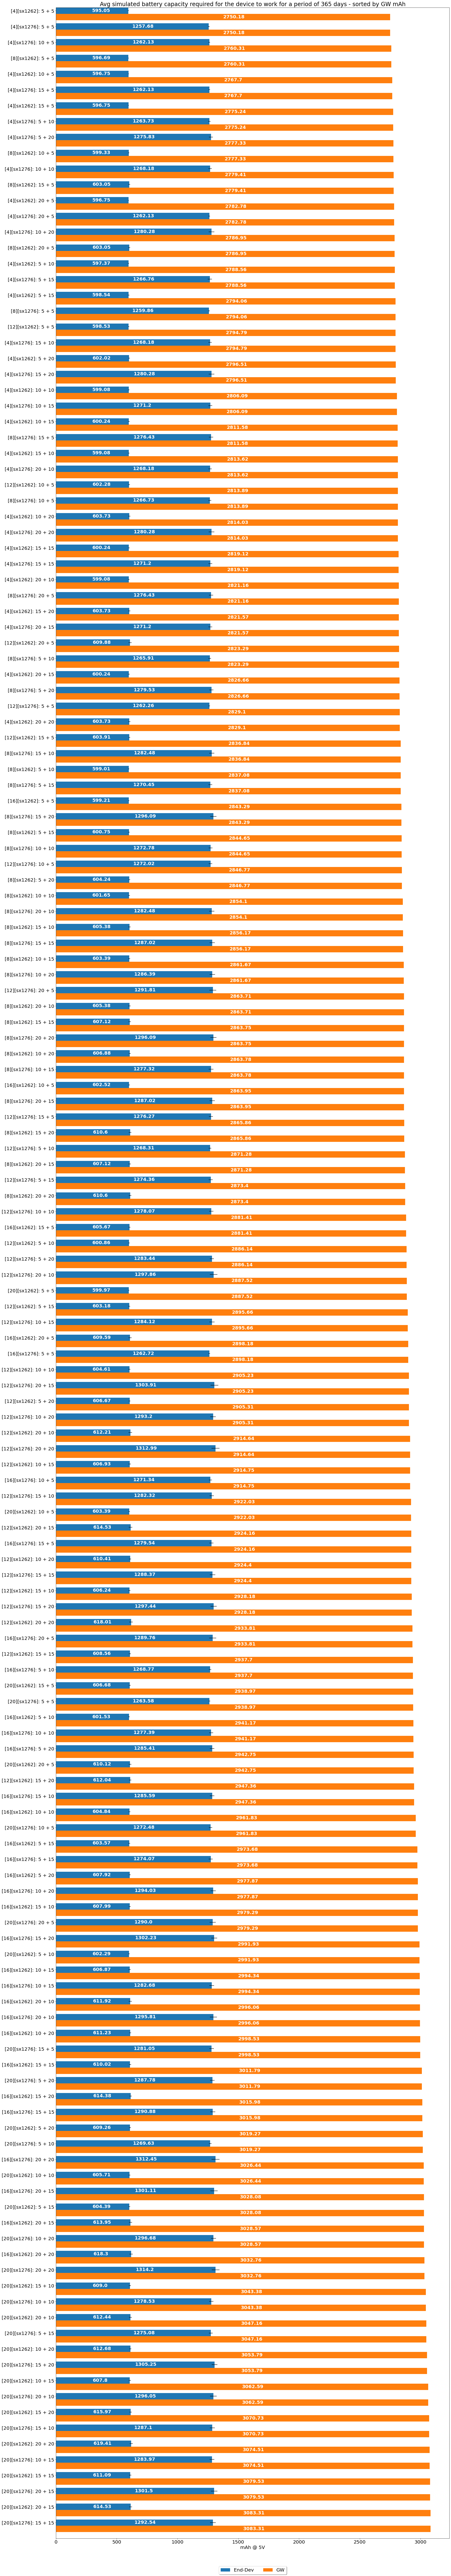

In [17]:
dev = sx1262_dev + sx1276_dev
labels = sx1262_labels + sx1276_labels
gw = sx1262_gw + sx1262_gw
std_dev = sx1262_std_dev + sx1276_std_dev

dev, labels, gw, std_dev = sort_by_first(dev, labels, gw, std_dev)
plot_hor_bars(labels, gw, dev, std_dev, 'Avg simulated battery capacity required for the device to work for a period of 365 days - sorted by End-Dev mAh', [30, 200])

gw, labels, dev, std_dev = sort_by_first(gw, labels, dev, std_dev)
plot_hor_bars(labels, gw, dev, std_dev, 'Avg simulated battery capacity required for the device to work for a period of 365 days - sorted by GW mAh', [30, 200])

# Experiment: 8 end-devices, send interval, discovery/dc every n commands [disc window: 5s, data collection window 5s]

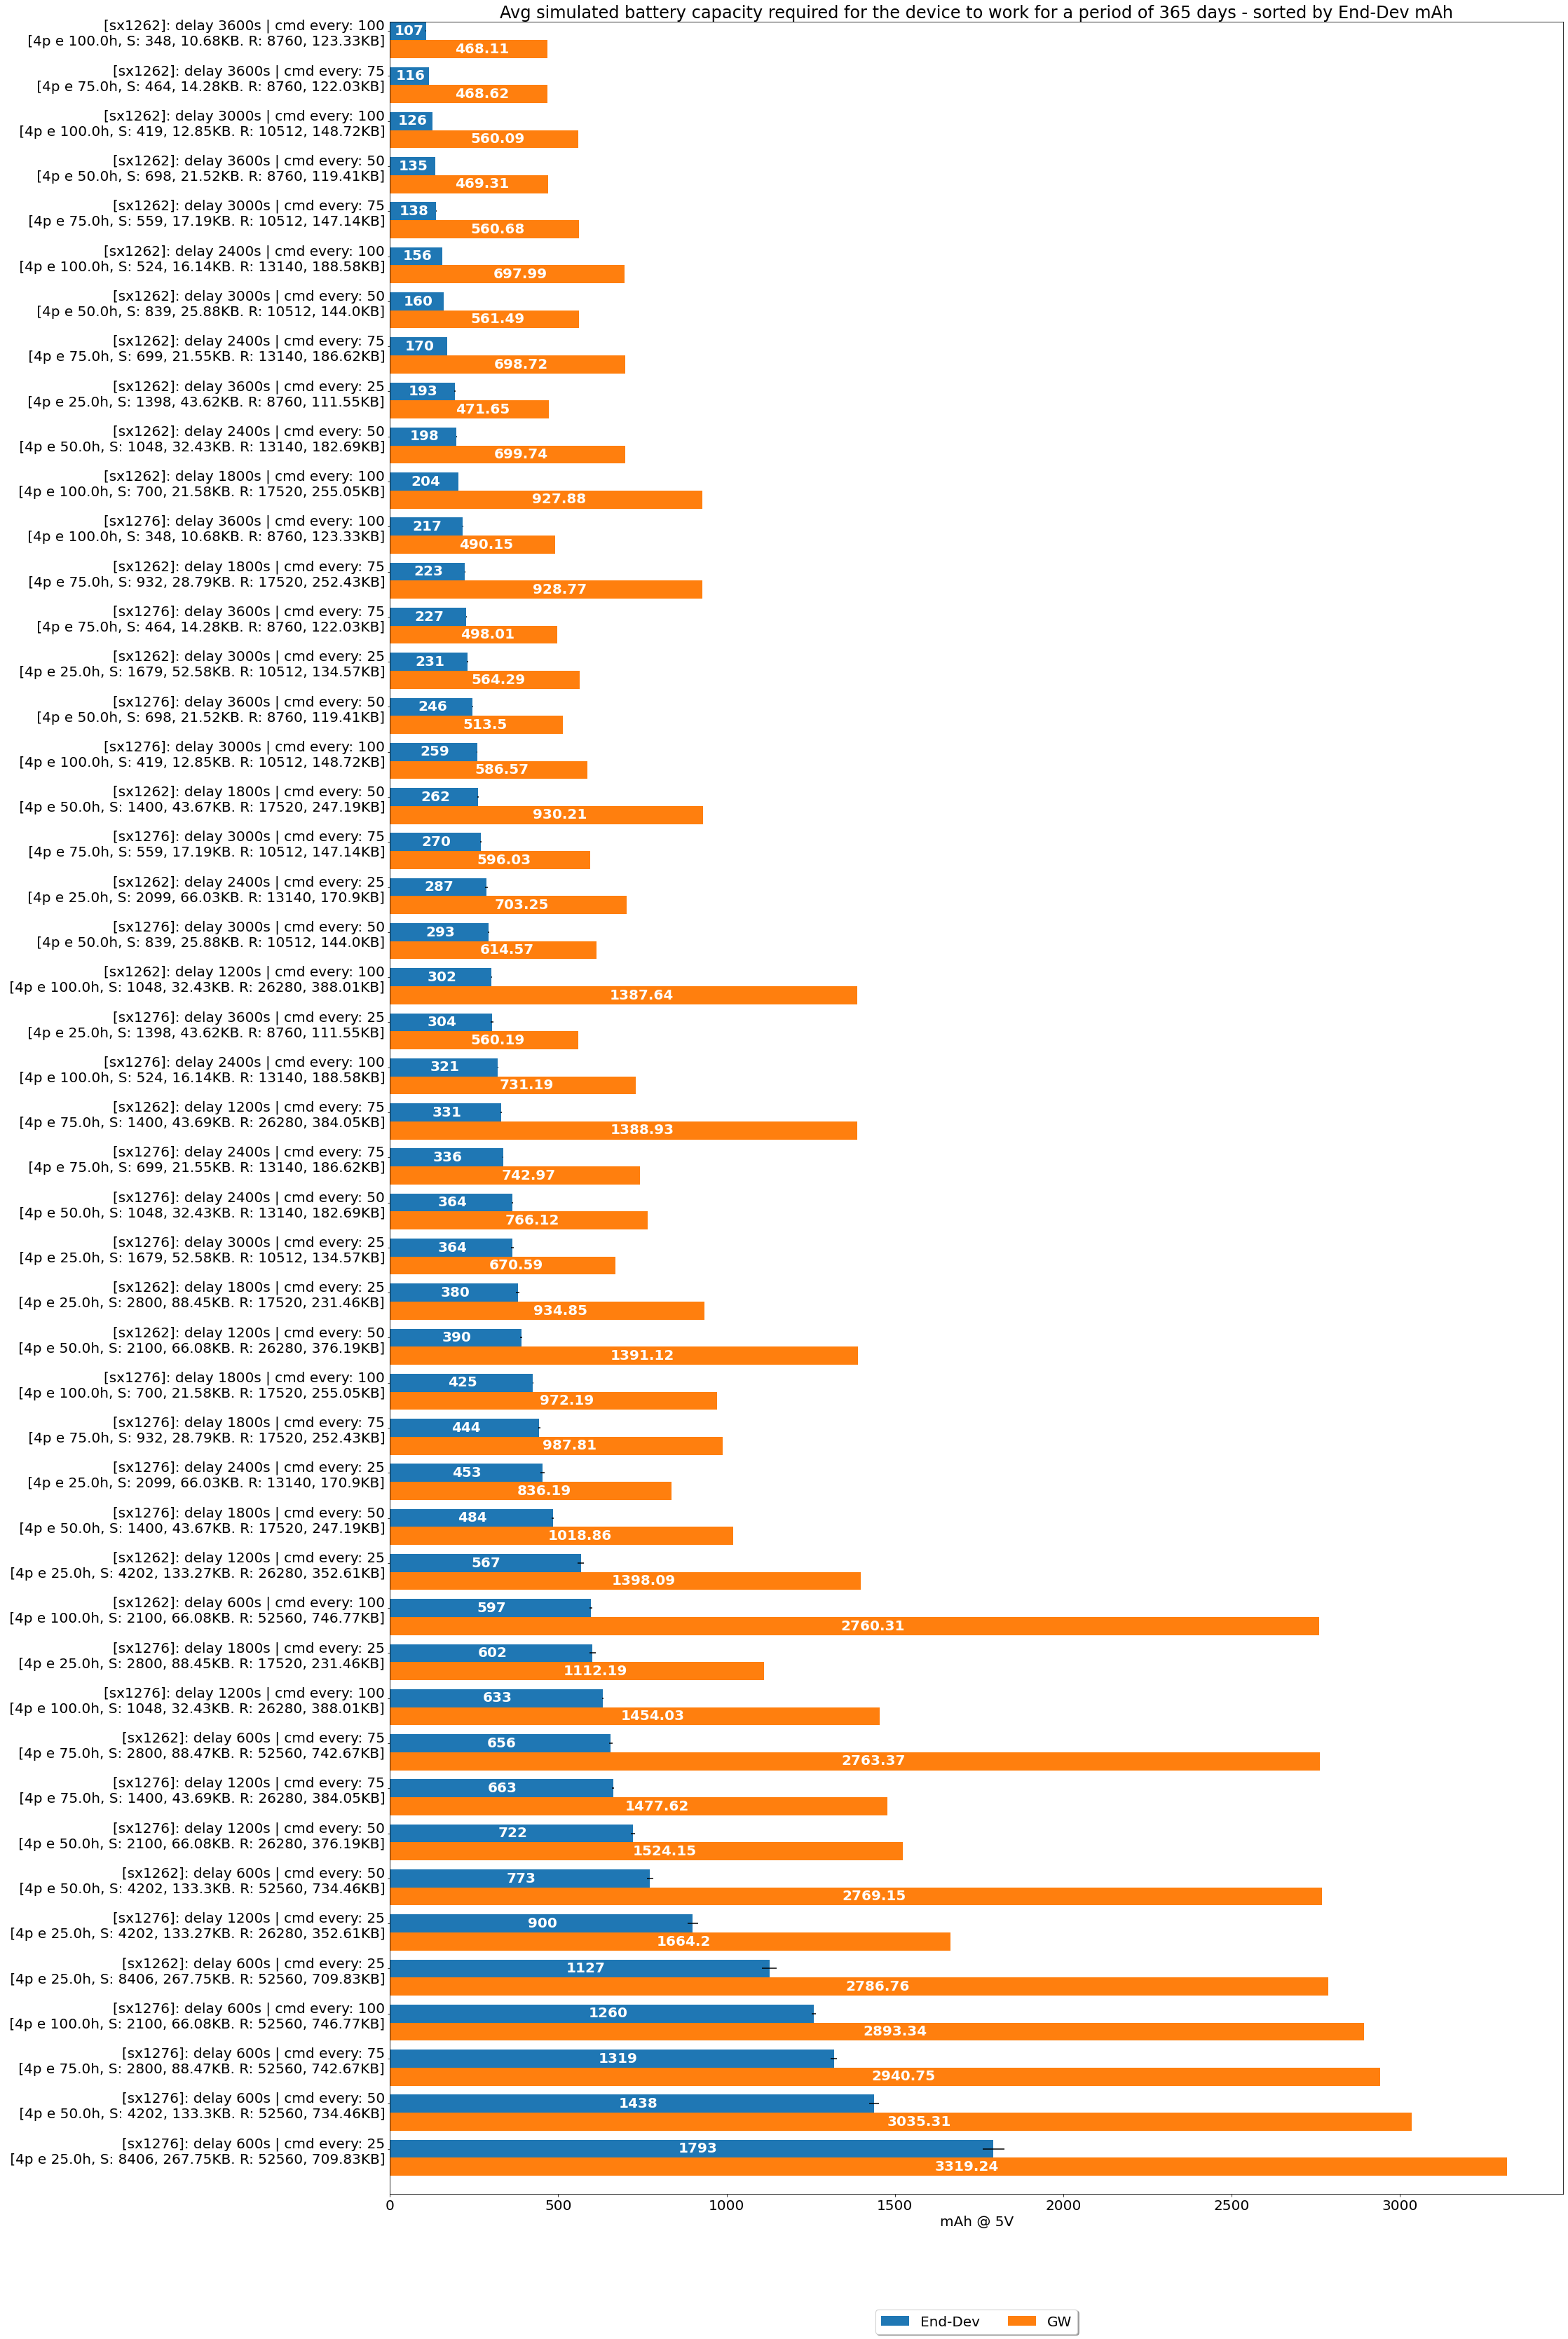

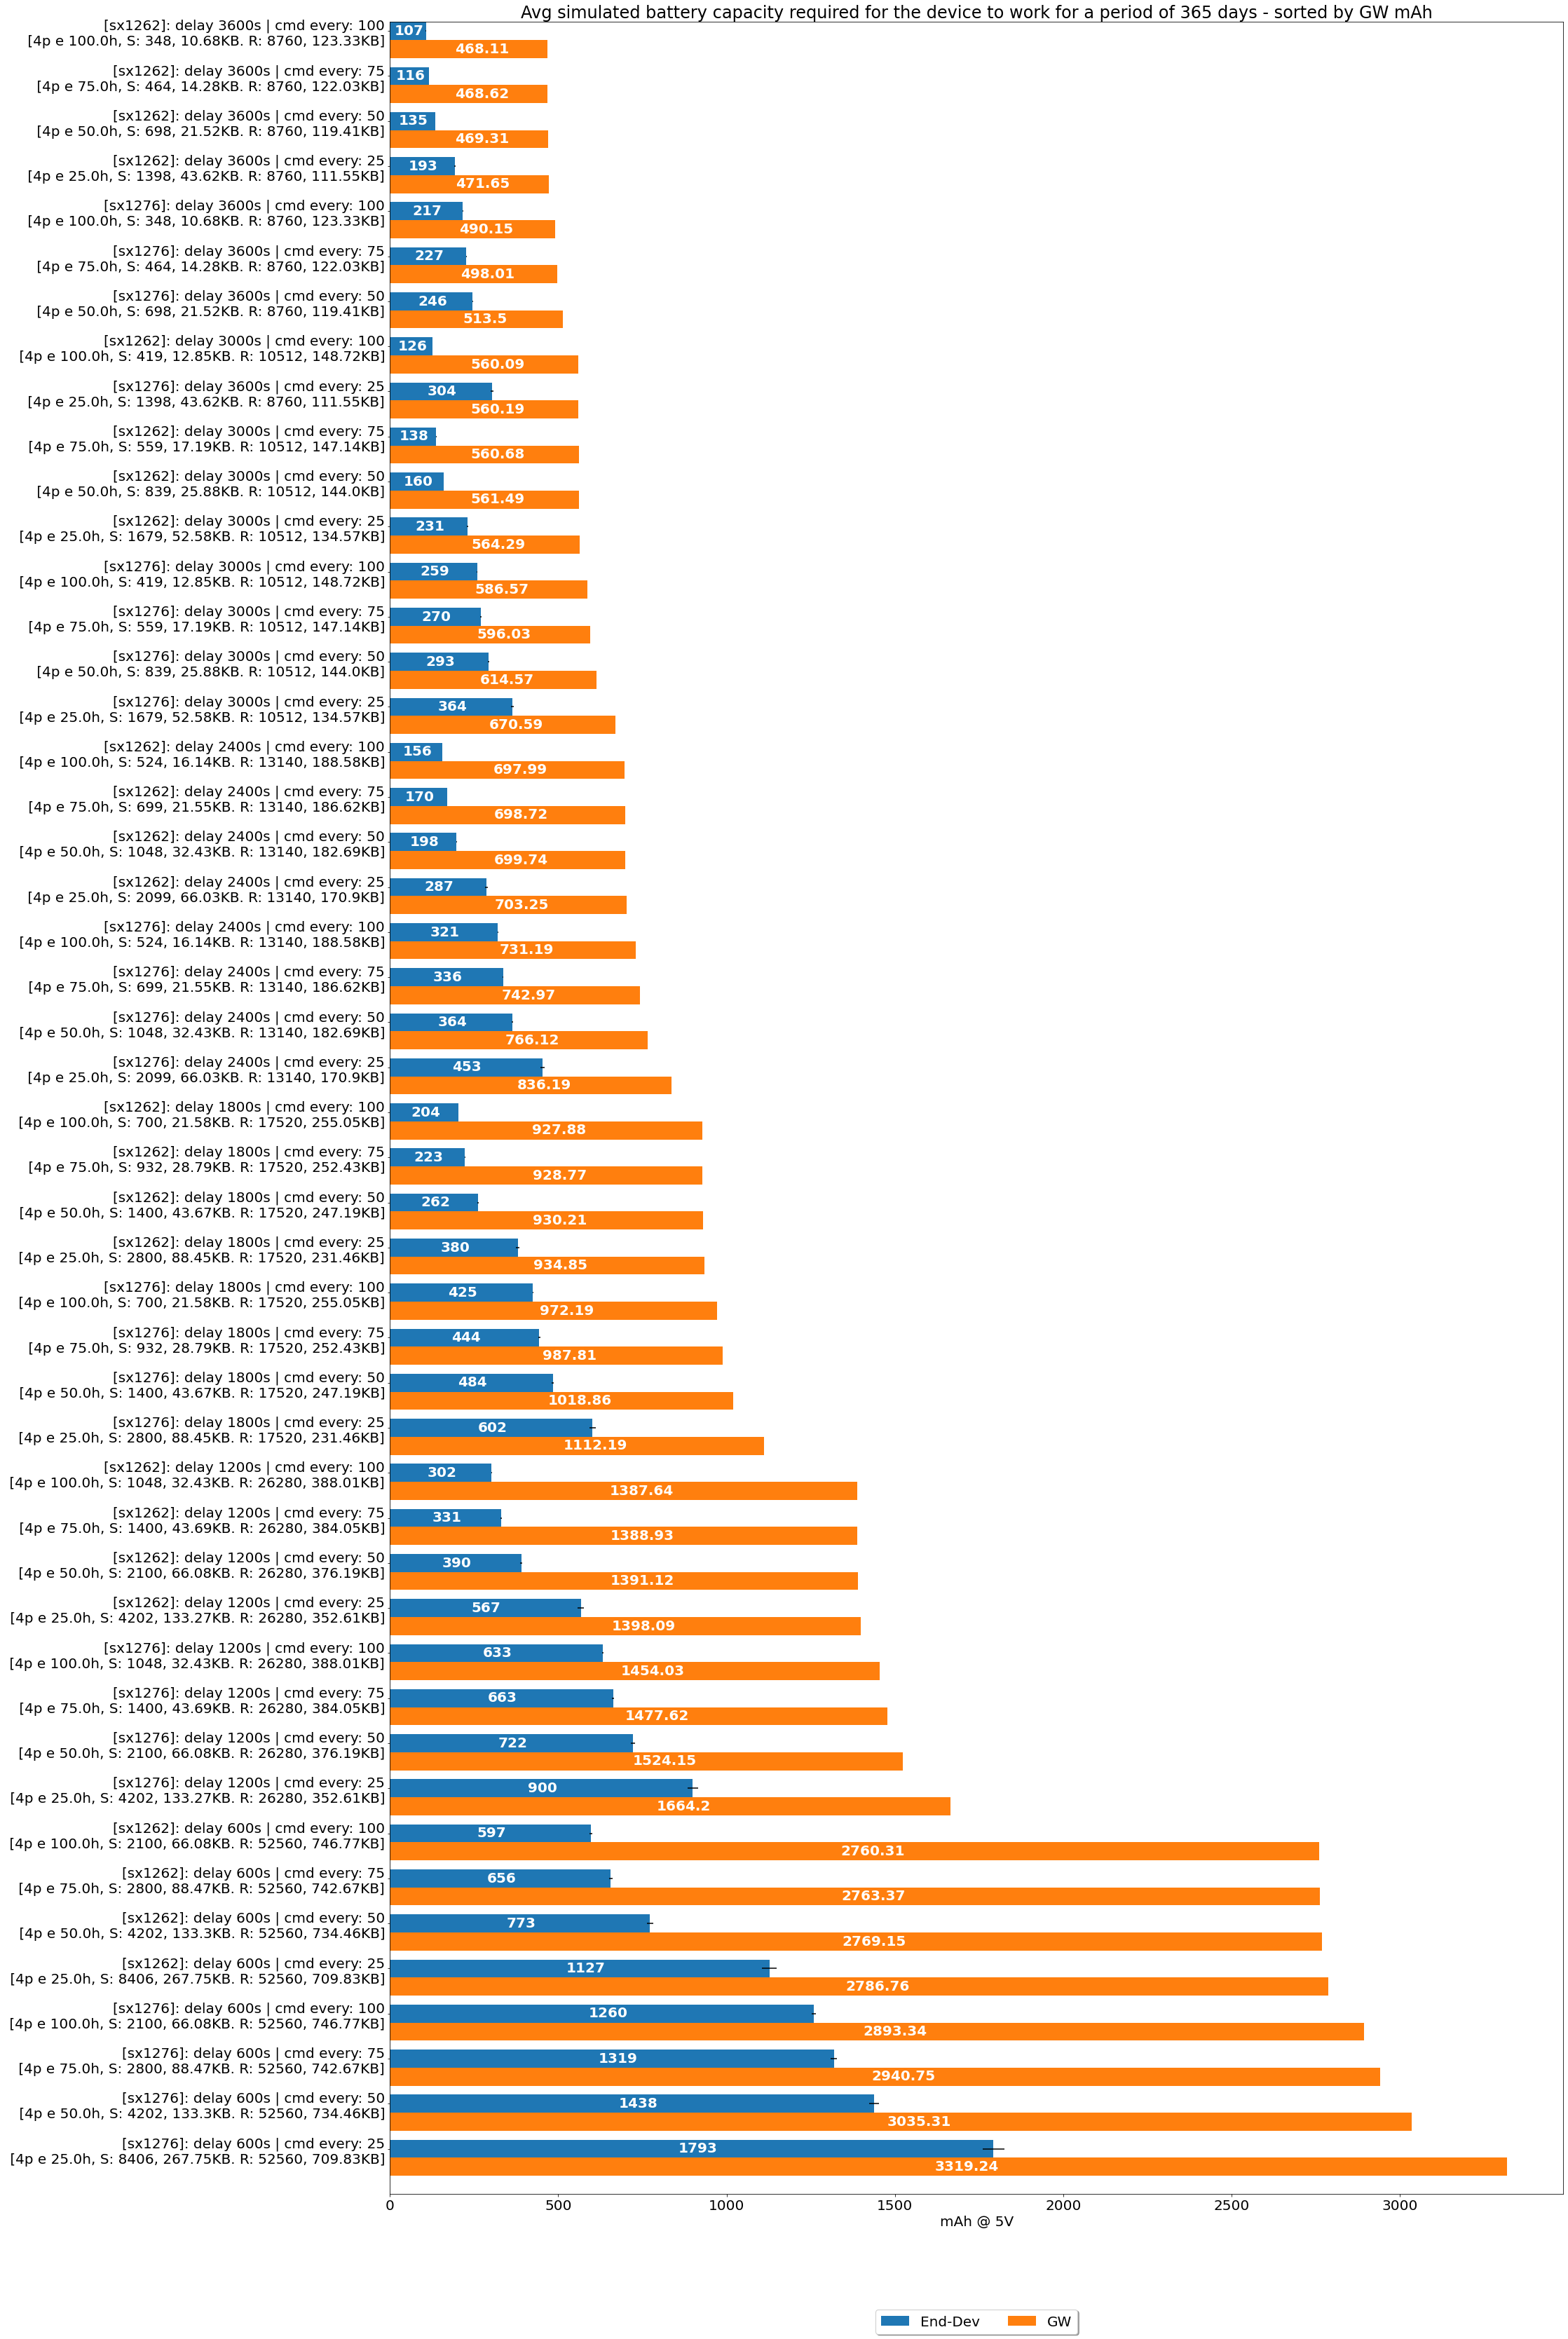

In [62]:
data_dir = '/mnt/green/lora_wakeup'
data = f'{data_dir}/sx1262_sx1276_sd_den'

labels_all = []
gw_all = []
dev_all = []
std_dev_all = []

energy, stats = extract_data(0, data, 31536000)
labels, gw, dev, std_dev = get_data_for_send_delay_hor(energy, stats)
labels_all.append(labels)
gw_all.append(gw)
dev_all.append(dev)
std_dev_all.append(std_dev)
    
labels = merge(labels_all)
gw = merge(gw_all)
dev = merge(dev_all)
std_dev = merge(std_dev_all)

fig_size = [30, 60]

dev, labels, gw, std_dev = sort_by_first(dev, labels, gw, std_dev)
plot_hor_bars(labels, gw, dev, std_dev, 'Avg simulated battery capacity required for the device to work for a period of 365 days - sorted by End-Dev mAh', fig_size)

gw, labels, dev, std_dev = sort_by_first(gw, labels, dev, std_dev)
plot_hor_bars(labels, gw, dev, std_dev, 'Avg simulated battery capacity required for the device to work for a period of 365 days - sorted by GW mAh', fig_size)